# Questo è il file principale dove verranno effettuate delle analisi complete su tutti i dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

##### dataset dei generi dei film

In [90]:
# breve analisi sul dataset dei generi
genres_df = pd.read_csv("Main_data/genres.csv")
ids_movies = genres_df['id'].unique()

print(genres_df.shape)
print(genres_df.columns)
print(genres_df.dtypes)
print(len(ids_movies))
print(genres_df["genre"].unique())

(1046849, 2)
Index(['id', 'genre'], dtype='object')
id        int64
genre    object
dtype: object
676491
['Comedy' 'Adventure' 'Thriller' 'Drama' 'Science Fiction' 'Action'
 'Music' 'Romance' 'History' 'Crime' 'Animation' 'Mystery' 'Horror'
 'Family' 'Fantasy' 'War' 'Western' 'TV Movie' 'Documentary']


In [86]:
# visualizziamo i genere per gruppo di id
grouped_genres_df = genres_df.groupby('id')["genre"].agg(list).reset_index()
grouped_genres_df


id                                         genre
0       1000001                           [Comedy, Adventure]
1       1000002                     [Comedy, Thriller, Drama]
2       1000003  [Science Fiction, Adventure, Comedy, Action]
3       1000004                                       [Drama]
4       1000005               [Drama, Comedy, Music, Romance]
...         ...                                           ...
676486  1941559                                      [Comedy]
676487  1941563                                       [Drama]
676488  1941566                                       [Crime]
676489  1941569                                       [Crime]
676490  1941596                               [Action, Crime]

[676491 rows x 2 columns]

##### dataset dei paesi di produzione

In [91]:

countries_df = pd.read_csv("Main_data/countries.csv")
grouped_countries_df = countries_df.groupby('id')["country"].agg(list).reset_index()
grouped_countries_df


id           country
0       1000001         [UK, USA]
1       1000002     [South Korea]
2       1000003             [USA]
3       1000004    [Germany, USA]
4       1000005  [Hong Kong, USA]
...         ...               ...
617187  1941593           [China]
617188  1941594             [USA]
617189  1941595             [USA]
617190  1941596           [China]
617191  1941597           [Japan]

[617192 rows x 2 columns]

In [92]:
# Analizziamo brevemente il dataset dei paesi di produzione per capire com'è strutturato
print(genres_df.shape)
print(genres_df.columns)
print(genres_df.dtypes)

print(countries_df["country"].unique())

(1046849, 2)
Index(['id', 'genre'], dtype='object')
id        int64
genre    object
dtype: object
['UK' 'USA' 'South Korea' 'Germany' 'Hong Kong' 'Canada' 'Sweden'
 'Ireland' 'Japan' 'China' 'France' 'Brazil' 'Italy' 'Czechia'
 'New Zealand' 'Australia' 'India' 'Spain' 'Austria' 'Greece'
 'Netherlands' 'Poland' 'Taiwan' 'Denmark' 'Norway' 'Mexico' 'Switzerland'
 'Turkey' 'Finland' 'USSR' 'Singapore' 'Chile' 'Belgium'
 'United Arab Emirates' 'Malta' 'Hungary' 'South Africa' 'Bulgaria'
 'Czechoslovakia' 'Argentina' 'Iceland' 'Indonesia' 'Slovenia' 'Iran'
 'Luxembourg' 'Philippines' 'Russian Federation' 'Malaysia' 'Portugal'
 'Serbia' 'Algeria' 'Estonia' 'Romania' 'Colombia' 'Thailand' 'Cyprus'
 'Lebanon' 'Qatar' 'Peru' 'Cambodia' 'Bahamas' 'Israel' 'Puerto Rico'
 'Cuba' 'Senegal' 'Bosnia and Herzegovina' 'Georgia' 'Guadeloupe'
 'Uruguay' 'Pakistan' 'Sri Lanka' 'Latvia' 'Tunisia' 'Dominican Republic'
 'Yugoslavia' 'Bolivarian Republic of Venezuela' 'Montenegro' 'Egypt'
 'Ethiopia' 'Ghana'

In [7]:
# Effettuaimo dei controlli sui dati per evitare di utilizzare lo stesso paese con nomi diversi
x = countries_df["country"].unique()
x.tolist()
# calcolo quanti elementi ci sono 
len(x)

# controllo se ci sono paesi con più nomi
s = pd.Series(x)
# potremmo incontrare ad esempio gli Stati Uniti indicati con United States of America o USA
s[s.str.contains("United", case = False, na = False)]

33                     United Arab Emirates
160             United Republic of Tanzania
238    United States Minor Outlying Islands
dtype: object

### eseguiamo delle analisi su un dataset composto per analizzare le correlazioni tra generi dei film

In [8]:
# uniamo i film con i loro generi
movies_df_norm = pd.read_csv("File_normalizzati/movies_normalized.csv")
movies_w_genres_df = pd.merge(movies_df_norm, grouped_genres_df, on = "id")
movies_w_genres_df

id                               name    date  \
0       1000001                             Barbie  2023.0   
1       1000002                           Parasite  2019.0   
2       1000003  Everything Everywhere All at Once  2022.0   
3       1000004                         Fight Club  1999.0   
4       1000005                         La La Land  2016.0   
...         ...                                ...     ...   
676486  1941559                                你谁啊     NaN   
676487  1941563                                数到三     NaN   
676488  1941566                             日本統一35     NaN   
676489  1941569                             日本統一38     NaN   
676490  1941596                                 重生     NaN   

                                              description  minute  rating  \
0       Barbie and Ken are having the time of their li...   114.0    3.86   
1       All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
2       An aging Chinese immigrant is swept up in an i...   140.0    4.30   
3       A ticking-time-bomb insomniac and a slippery s...   139.0    4.27   
4       Mia, an aspiring actress, serves lattes to mov...   129.0    4.09   
...                                                   ...     ...     ...   
676486                                                NaN    67.0     NaN   
676487                                                NaN     NaN     NaN   
676488  The leaders of the Kyowakai are surprised that...    80.0     NaN   
676489  Obuchi, the young leader of Gasonkai, a group ...    70.0     NaN   
676490  In a world where order has broken down, darkne...     NaN     NaN   

                                               genre  
0                                [Comedy, Adventure]  
1                          [Comedy, Thriller, Drama]  
2       [Science Fiction, Adventure, Comedy, Action]  
3                                            [Drama]  
4                    [Drama, Comedy, Music, Romance]  
...                                              ...  
676486                                      [Comedy]  
676487                                       [Drama]  
676488                                       [Crime]  
676489                                       [Crime]  
676490                               [Action, Crime]  

[676491 rows x 7 columns]

In [95]:
# eseguiamo una breve analisi esplorativa sul numero di film per genere ad esempio le commedie

tot_comedy = movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x).sum()
print(f"Totale delle commedie: {tot_comedy}")


Totale delle commedie: 140636


In [94]:
# adesso proviamo a generare una tabella con tutti i film comici
movies_w_genres_df[movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)

id                                               name    date  \
0       1000001                                             Barbie  2023.0   
1       1000002                                           Parasite  2019.0   
2       1000003                  Everything Everywhere All at Once  2022.0   
3       1000005                                         La La Land  2016.0   
4       1000015                                         Knives Out  2019.0   
...         ...                                                ...     ...   
140631  1941496                              Una pequeña confusión     NaN   
140632  1941498                            Under the September Sun     NaN   
140633  1941503  The Unknown with Ethan Cox and Larry Bonner (S...     NaN   
140634  1941517                                       Vimazoluleka     NaN   
140635  1941559                                                你谁啊     NaN   

                                              description  minute  rating  \
0       Barbie and Ken are having the time of their li...   114.0    3.86   
1       All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
2       An aging Chinese immigrant is swept up in an i...   140.0    4.30   
3       Mia, an aspiring actress, serves lattes to mov...   129.0    4.09   
4       When renowned crime novelist Harlan Thrombey i...   131.0    3.99   
...                                                   ...     ...     ...   
140631  Lola and Cuau, a progressive middle-class pair...     NaN     NaN   
140632                                  Plot under wraps.   120.0     NaN   
140633  Trained paranormal professionals Ethan Cox and...    12.0     NaN   
140634  Year 1966  Vimazoluleka is the first play that...    96.0     NaN   
140635                                                NaN    67.0     NaN   

                                               genre  
0                                [Comedy, Adventure]  
1                          [Comedy, Thriller, Drama]  
2       [Science Fiction, Adventure, Comedy, Action]  
3                    [Drama, Comedy, Music, Romance]  
4                           [Mystery, Comedy, Crime]  
...                                              ...  
140631                                      [Comedy]  
140632                      [Comedy, Romance, Drama]  
140633                              [Horror, Comedy]  
140634                                      [Comedy]  
140635                                      [Comedy]  

[140636 rows x 7 columns]

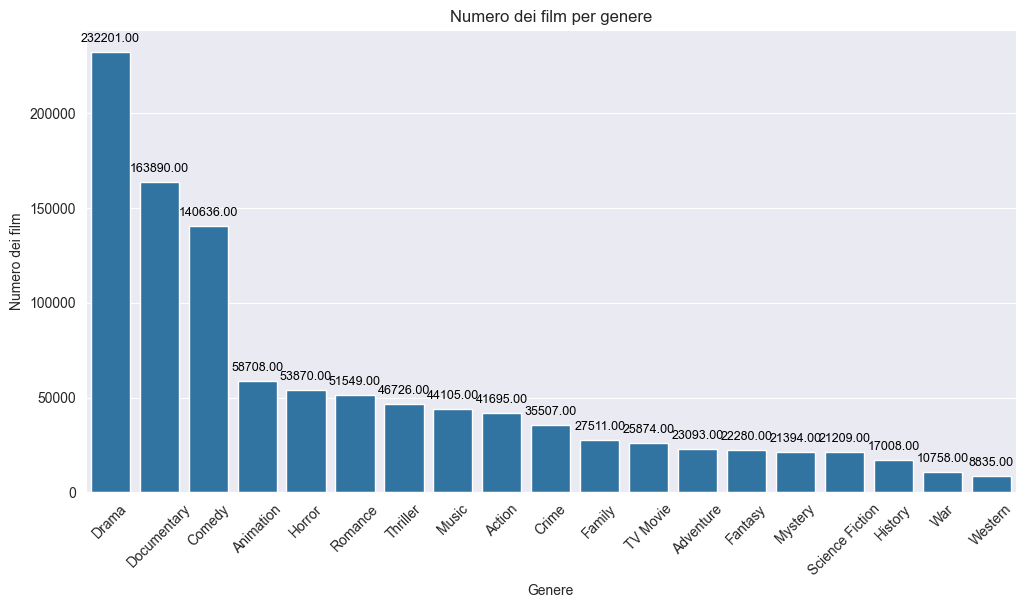

In [98]:
# mostriamo in un grafico il numero di film per genere
plt.figure(figsize=(12,6))
ax = sns.countplot(data = movies_w_genres_df.explode("genre"), x = "genre", order = movies_w_genres_df.explode("genre")["genre"].value_counts().index)
plt.title("Numero dei film per genere")

add_count_on_bars(ax)

plt.xlabel("Genere")
plt.ylabel("Numero dei film")
plt.xticks(rotation = 45)
plt.show()


Il genre più apprezzato è Documentary con una valutazione media di 3.52


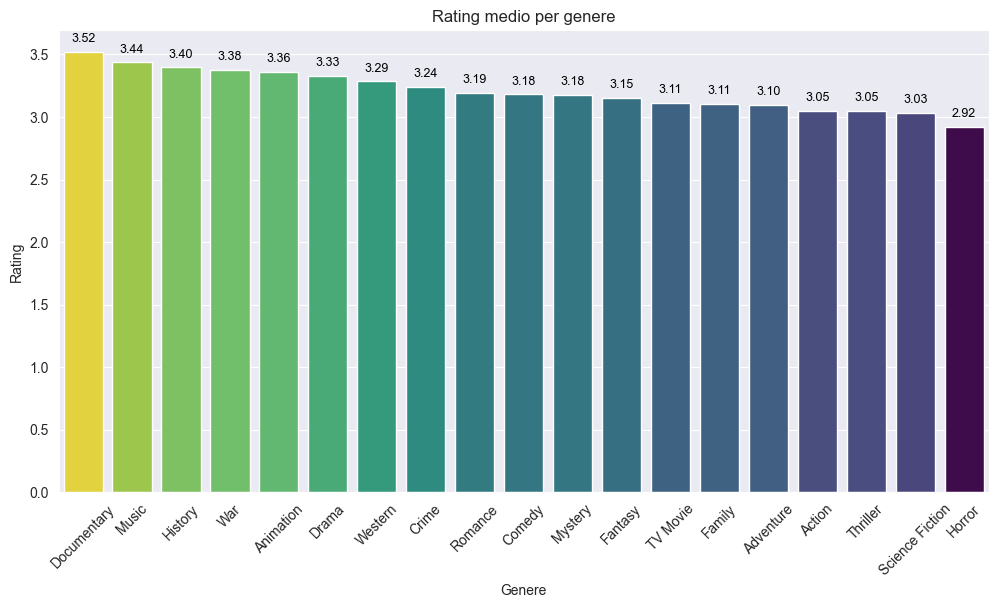

In [99]:
# mostriamo un grafico con il genere più apprezzato facendo una media dei rating

# per eseguire un'analisi corretta dobbiamo separare i film con generi multipli per ottenere tuple con un singolo genere
exploded_genres_df = movies_w_genres_df.explode("genre").reset_index(drop = True).copy()
genre_ratings_df = exploded_genres_df.groupby("genre")["rating"].mean().sort_values(ascending = False)

plt.figure(figsize= (12, 6))
ax = sns.barplot(y = genre_ratings_df.values, x = genre_ratings_df.index, hue = genre_ratings_df, palette = "viridis", order= genre_ratings_df.index, legend = False)
plt.title("Rating medio per genere")
plt.xlabel("Genere")
plt.ylabel("Rating")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

most_appreciated_genre = genre_ratings_df.index[0]
average_rating_most_appreciated = genre_ratings_df.iloc[0]
print(f"\nIl genre più apprezzato è {most_appreciated_genre} con una valutazione media di {average_rating_most_appreciated:.2f}")


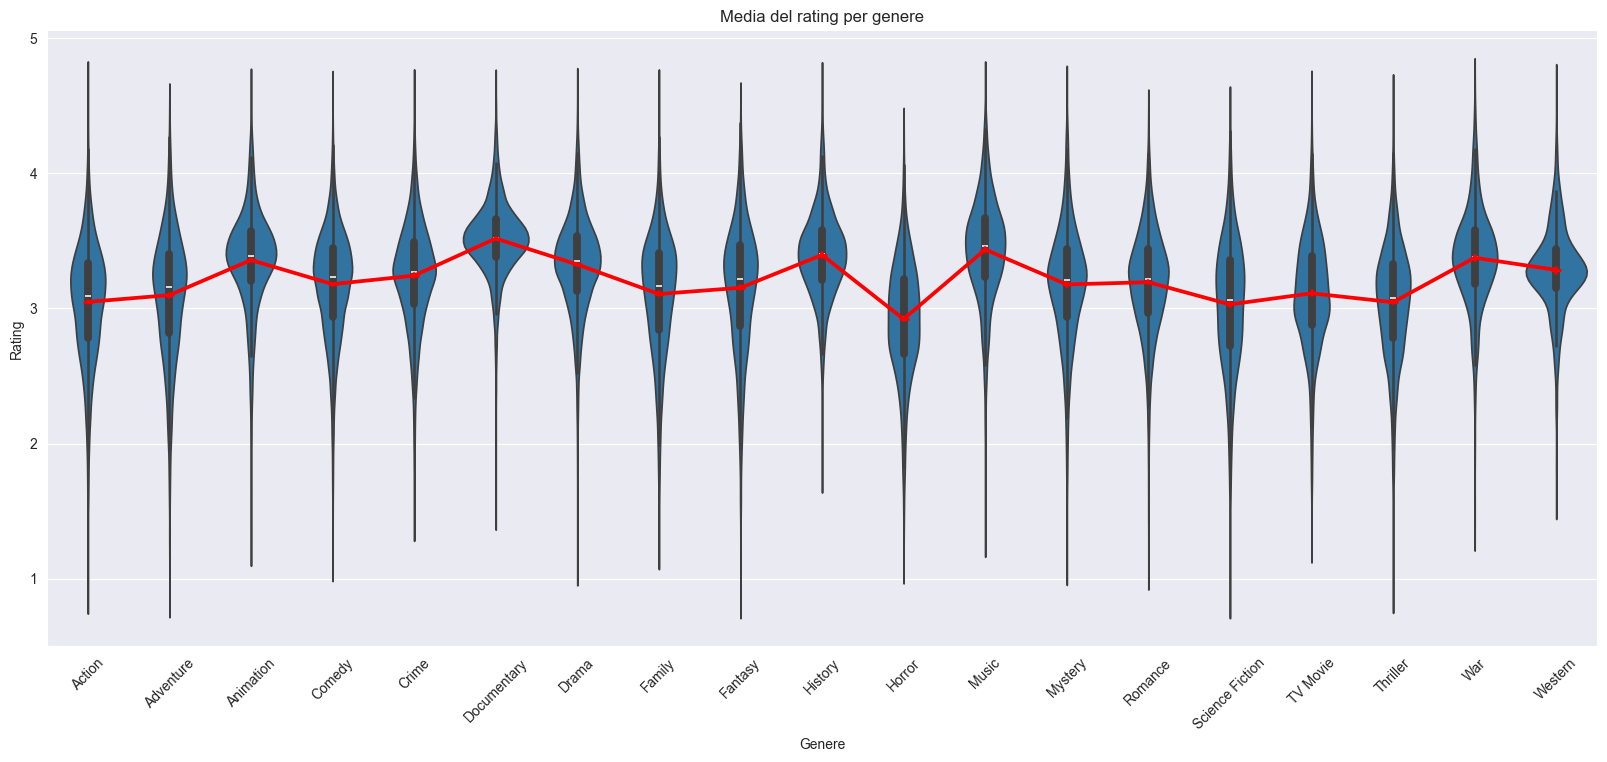

In [100]:
# utilizziamo un grafico a violino per mostrare la distribuzione del rating per ogni genere
plt.figure(figsize = (20, 8))

genre_order = sorted(exploded_genres_df['genre'].unique())

ax = sns.violinplot(data = exploded_genres_df, x = "genre", y = "rating", order = genre_order)

# Sovrapponiamo un pointplot per mostrare la media
# Useremo "estimator" per calcolare la media, "markers" per lo stile della linea
sns.pointplot(data=exploded_genres_df,
              x="genre", y="rating",
              estimator="mean",
              markers="_",
              color="red",
              ax=ax,
              order=genre_order)

plt.title("Media del rating per genere")
plt.xlabel("Genere")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

##### eseguiamo un'analisi sui generi per vedere qual è il più apprezzato in determinati range di periodo

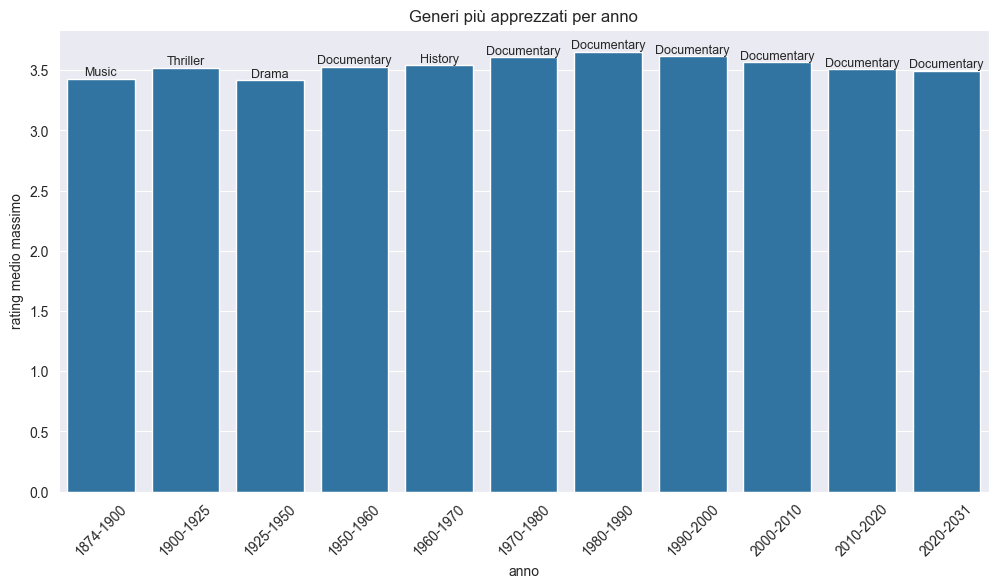

In [13]:
# creazione di un range di anni per analizzare i film in base al loro anno di uscita
year_range = [movies_w_genres_df["date"].min(), 1900, 1925, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float("inf")]
labels = ["1874-1900", "1900-1925", "1925-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "2020-2031"]

movies_w_genres_t_range_df = movies_w_genres_df.copy()  # creiamo una copia perchè andremo a modificare il dataset aggiungendo una colonna
# nuova colonna per il range di anni
movies_w_genres_t_range_df["year_range"] = pd.cut(movies_w_genres_df["date"], bins = year_range, labels = labels, right = False)

# divisione dei generi dei film
exploded_genre_yr = movies_w_genres_t_range_df.explode("genre").copy()

# calcolo della media dei rating per ogni genere e range di anni
avg_rating_per_genre_range = exploded_genre_yr.groupby(["year_range", "genre"], observed = True)["rating"].mean().reset_index()

# indice per ottenere il rating massimo per selezionare il record corretto
idx = avg_rating_per_genre_range.groupby("year_range", observed=True)["rating"].idxmax()
top_genre_per_year = avg_rating_per_genre_range.loc[idx]

plt.figure(figsize = (12,6))
ax = sns.barplot(data = top_genre_per_year, x = "year_range", y = "rating")

# blocco di codice per stampare il genere sopra le barre  ------ NOTE: questo blocco di codice è stato realizzato in parte grazie all'aiuto dell'AI
for i, bar in enumerate(ax.patches):
    # Prendi la riga di dati corrispondente alla barra i-esima
    try:
        row_data = top_genre_per_year.iloc[i]
        genre_label = row_data['genre'] # Prendi il genere da quella riga

        ax.text(
            bar.get_x() + bar.get_width() / 2., # Posizione X (centro della barra)
            bar.get_height(),                   # Posizione Y (cima della barra)
            genre_label,                        # Testo da mostrare (il genere)
            ha='center',                        # Allineamento orizzontale
            va='bottom',                        # Allineamento verticale
            rotation=0,                         # Ruota leggermente
            fontsize=9                          # Dimensione font
        )
    except IndexError:
        print(f"Warning: Mismatch between number of bars ({len(ax.patches)}) and data rows ({len(top_genre_per_year)}) at index {i}. Skipping annotation.")


plt.title("Generi più apprezzati per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()
    


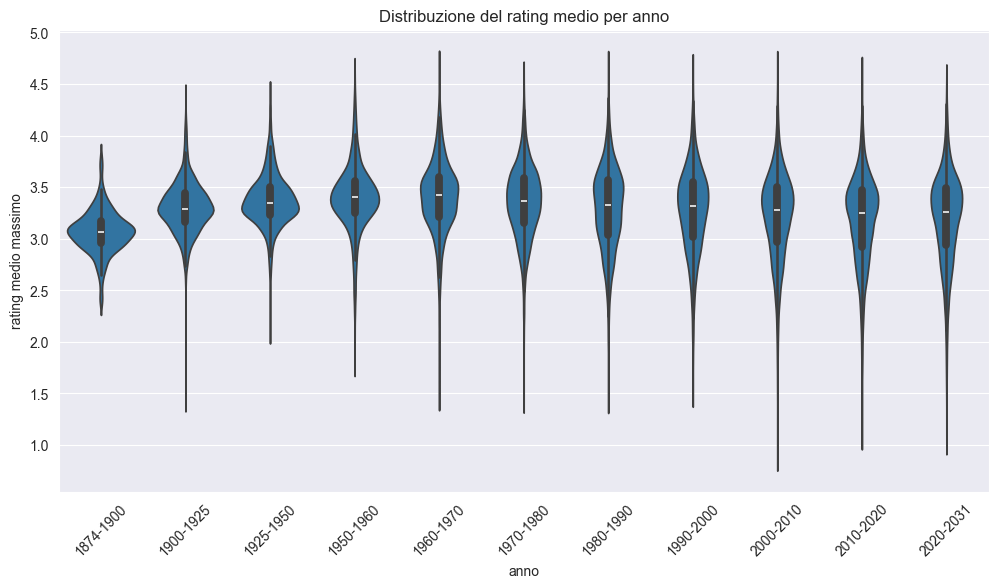

In [14]:
#violin plot diviso per range di anno
plt.figure(figsize = (12, 6))
ax = sns.violinplot(data = movies_w_genres_t_range_df, x = "year_range", y = "rating")
plt.title("Distribuzione del rating medio per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()

# questo grafico all'apparenza senza una valore informativo in realtà ci dice che nei primi anni di produzione i film ottenevano un rating simile e non si discostavano molto dal valore medio, invece con il passare degli anni il rating aumenta il suo delta sempre di più

##### calcoliamo l'andamento del rating per anno

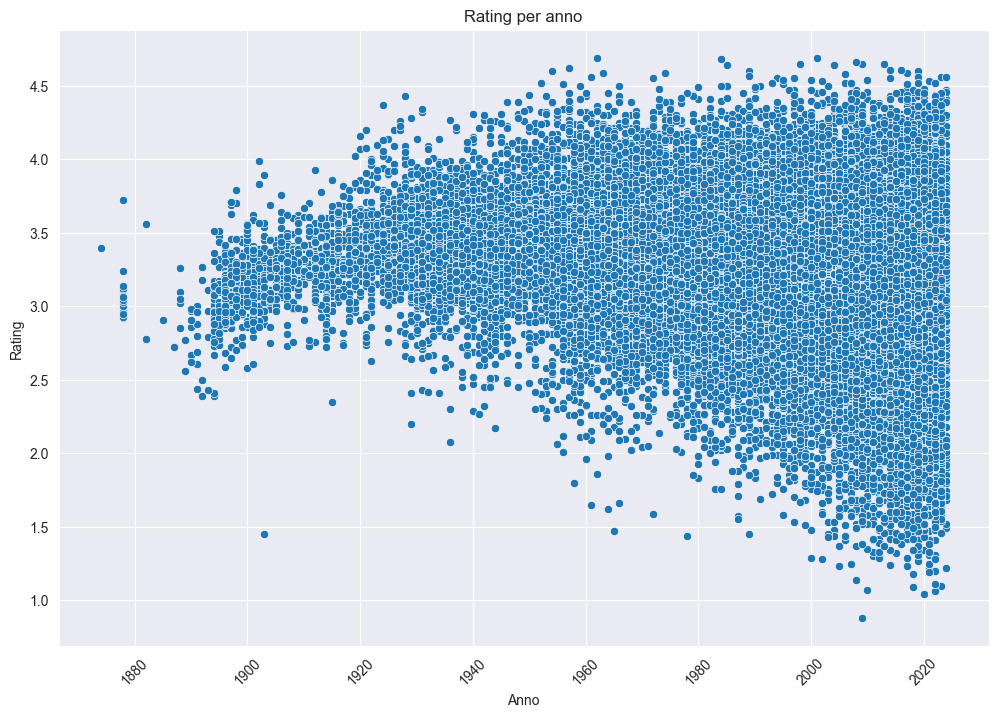

In [102]:
# data di uscita vs rating usando uno scatterplot
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(data = movies_w_genres_t_range_df, x = "date", y = "rating")

plt.title("Rating per anno")
plt.xlabel("Anno")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

# questo grafico ci aiuta a comprendere il grafico precedente rappresentando una figura a cono che con il passare degli anni indica un netto aumento della disparità dei rating

##### eseguiamo delle analisi sul minutaggio

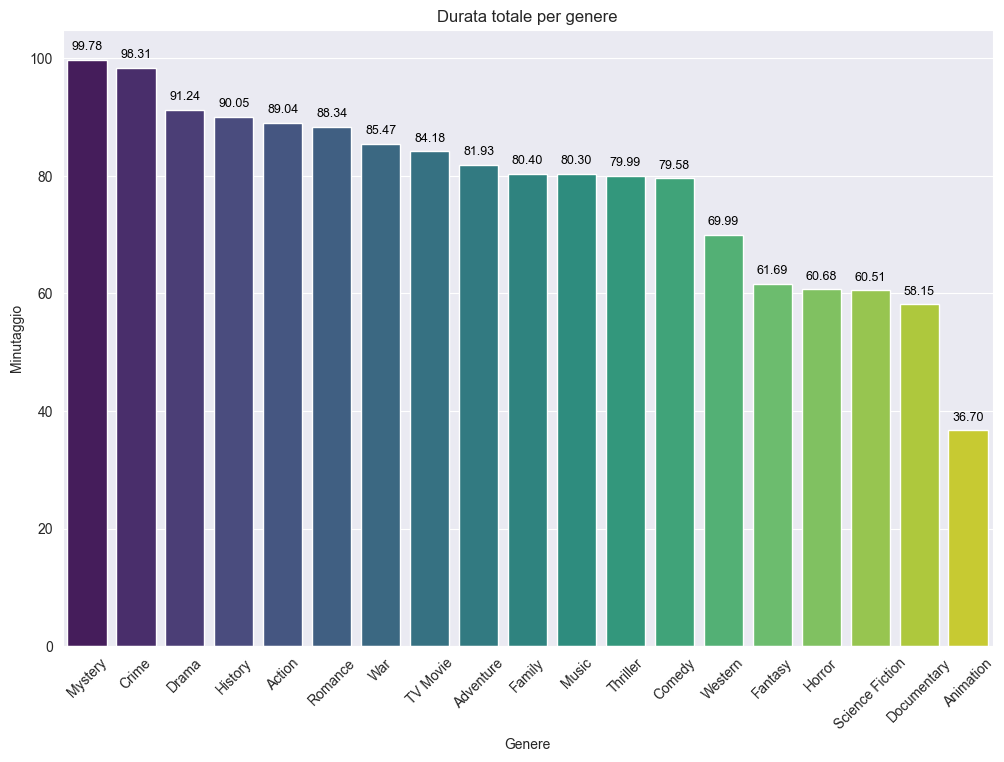

In [103]:
# raggruppiamo i generi e calcoliamo la media della durata per ognuno di essi così da trovare il genere che ha una durata maggiore
genre_duration_df = exploded_genres_df.groupby("genre")["minute"].mean()
genre_duration_df = genre_duration_df.sort_values(ascending = False)

plt.figure(figsize = (12, 8))
ax = sns.barplot(x = genre_duration_df.index, y = genre_duration_df.values, hue = genre_duration_df.index, palette = "viridis", order = genre_duration_df.index)
plt.title("Durata totale per genere")
plt.xlabel("Genere")
plt.ylabel("Minutaggio")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

plt.show()

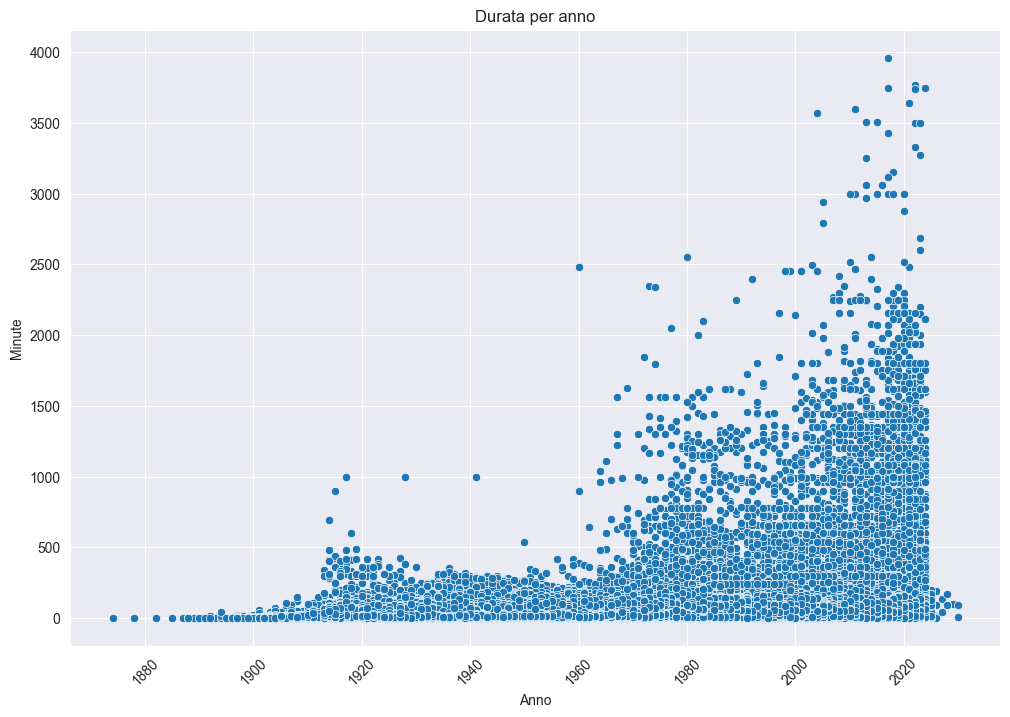

In [17]:
# proiezione di come è variato il minutaggio nel tempo
plt.figure(figsize = (12, 8))
# selezioniamo un minutaggio massimo per evitare outliers o film con una durata eccessiva per non disturbare la visualizzazione
movies_duration_df = movies_w_genres_df[movies_w_genres_df["minute"] < 4000]
ax = sns.scatterplot(data = movies_duration_df, x = "date", y = "minute")
plt.title("Durata per anno")
plt.xlabel("Anno")
plt.ylabel("Minute")
plt.xticks(rotation = 45)
plt.show()

##### altre analisi da effettuare sul dataset movies_w_genres_df

In [18]:
# di che genere sono i film che hanno una maggiore durata
cols = ["name", "minute","genre", "date"]
# selezioniamo un valore per determinare quali sono i film che hanno una durata maggiore ad esempio 10000 minuti
movies_w_genres_df.loc[movies_w_genres_df["minute"] > 10000][cols]


name   minute          genre    date
27574                    Logistics  51420.0  [Documentary]  2011.0
71193                    Cinématon  12480.0  [Documentary]  1978.0
92434         Modern Times Forever  14400.0  [Documentary]  2011.0
181510               Al Zeer Salem  72000.0        [Drama]  2000.0
285645  Svalbard minutt for minutt  13319.0  [Documentary]  2020.0
384426            Eighteen Springs  58800.0        [Drama]  2002.0

##### calcoliamo quale dovrebbe essere la durata di un film per ogni genre in base al rating

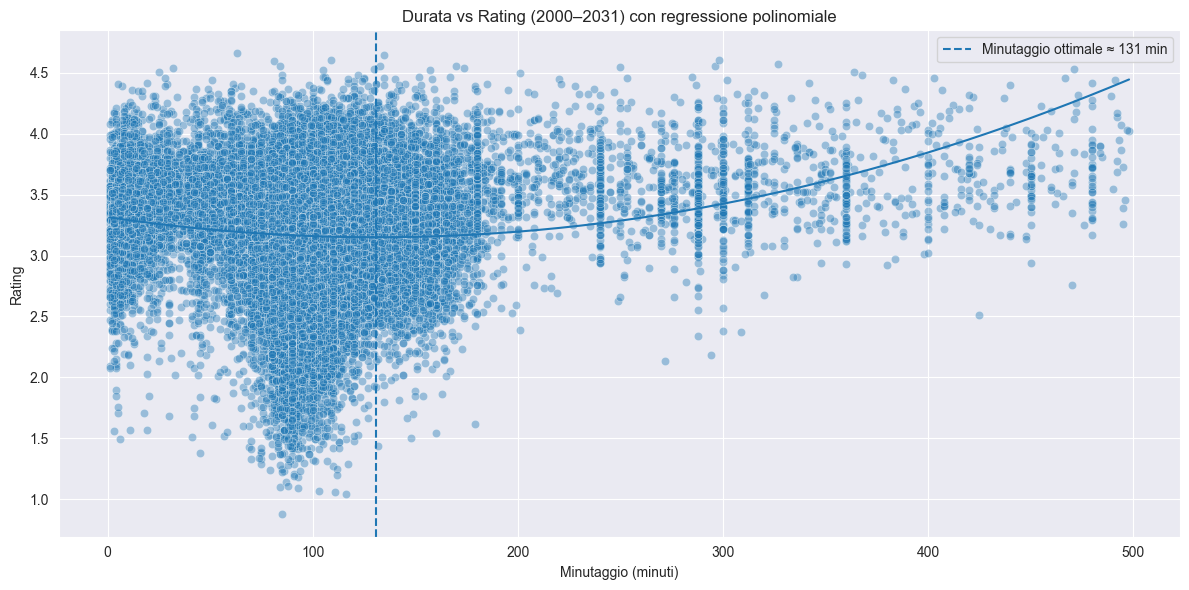

In [19]:
# prendiamo in esame il range che va dal 2000 al 2031 e proviamo a calcolare quale dovrebbe essere il minutaggio corretto per aumentare le probabilità di avere un rating maggiore.
# etichette che contengono gli anni dal 2000 al 2031
target_labels = ["2000-2010", "2010-2020", "2020-2031"]
# filtro su year_range
movies_2000_2031 = (movies_w_genres_t_range_df[movies_w_genres_t_range_df["year_range"].isin(target_labels)]
                    .dropna(subset = ["minute", "rating"])).query("minute < 500")


# il codice è stato generato grazie al supporto dell'AI ----------------------------

# 2) Estrai le variabili
X = movies_2000_2031["minute"].values
Y = movies_2000_2031["rating"].values

# 3) Fit polinomiale di grado 2: y ≈ a·x² + b·x + c
a, b, c = np.polyfit(X, Y, deg=2)

# 4) Calcola il vertice della parabola (minuto ottimale)
optimal_minute = -b / (2 * a)

# 5) Crea il plot
x_range = np.linspace(X.min(), X.max(), 500)
y_pred  = np.polyval([a, b, c], x_range)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X, y=Y, alpha=0.4)
plt.plot(x_range, y_pred)
plt.axvline(optimal_minute, linestyle="--",
            label=f"Minutaggio ottimale ≈ {optimal_minute:.0f} min")
plt.title("Durata vs Rating (2000–2031) con regressione polinomiale")
plt.xlabel("Minutaggio (minuti)")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()

### Analisi su un dataset composto per analizzare le correlazioni dei film per paese di produzione

In [20]:
movies_w_country_df = pd.merge(movies_df_norm, grouped_countries_df, on = "id")

# creaimo una copia del dataset
movies_w_country_exp_df = movies_w_country_df.explode("country").copy().reset_index(drop = True)

# ci concentriamo sui paesi che hanno prodotto più di 10000 film in quanto rappresentare tutte le nazioni che hanno prodotto un film altera le rappresentazioni grafiche
country_group_df = movies_w_country_exp_df.groupby("country")["id"].count().reset_index()
country_group_df = country_group_df[country_group_df["id"] > 10000]["country"]

In [21]:

country_group_df.unique()


array(['Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy',
       'Japan', 'Mexico', 'Russian Federation', 'South Korea', 'Spain',
       'UK', 'USA'], dtype=object)

In [22]:
# otteniamo un dataset completo con le migliori nazioni
movies_w_best_country_df = movies_w_country_exp_df.merge(country_group_df, on = "country")
movies_w_best_country_df["country"].unique()

array(['UK', 'USA', 'South Korea', 'Germany', 'Canada', 'Japan', 'China',
       'France', 'Brazil', 'Italy', 'India', 'Spain', 'Mexico',
       'Russian Federation'], dtype=object)

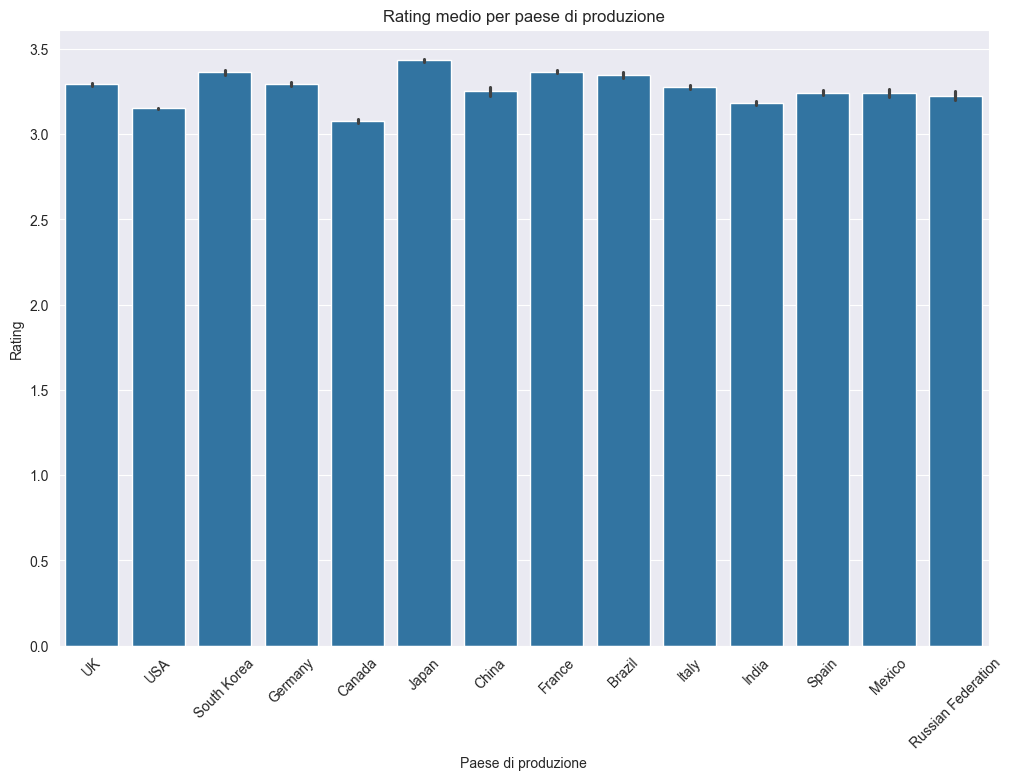

In [23]:
# calcoliamo qual è il rating medio per ogni paese di produzione
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = movies_w_best_country_df, x = "country", y = "rating")

plt.title("Rating medio per paese di produzione")
plt.xlabel("Paese di produzione")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

#### analisi incrociata dei generi con i paesi di produzione

In [24]:
# creiamo un ulteriore dataset che contiene i generi, i paesi di produzione e il range di anno di produzione
movies_w_genres_and_country_df = pd.merge(movies_w_best_country_df, exploded_genre_yr, on = ["id", "name", "date", "description", "minute", "rating"])

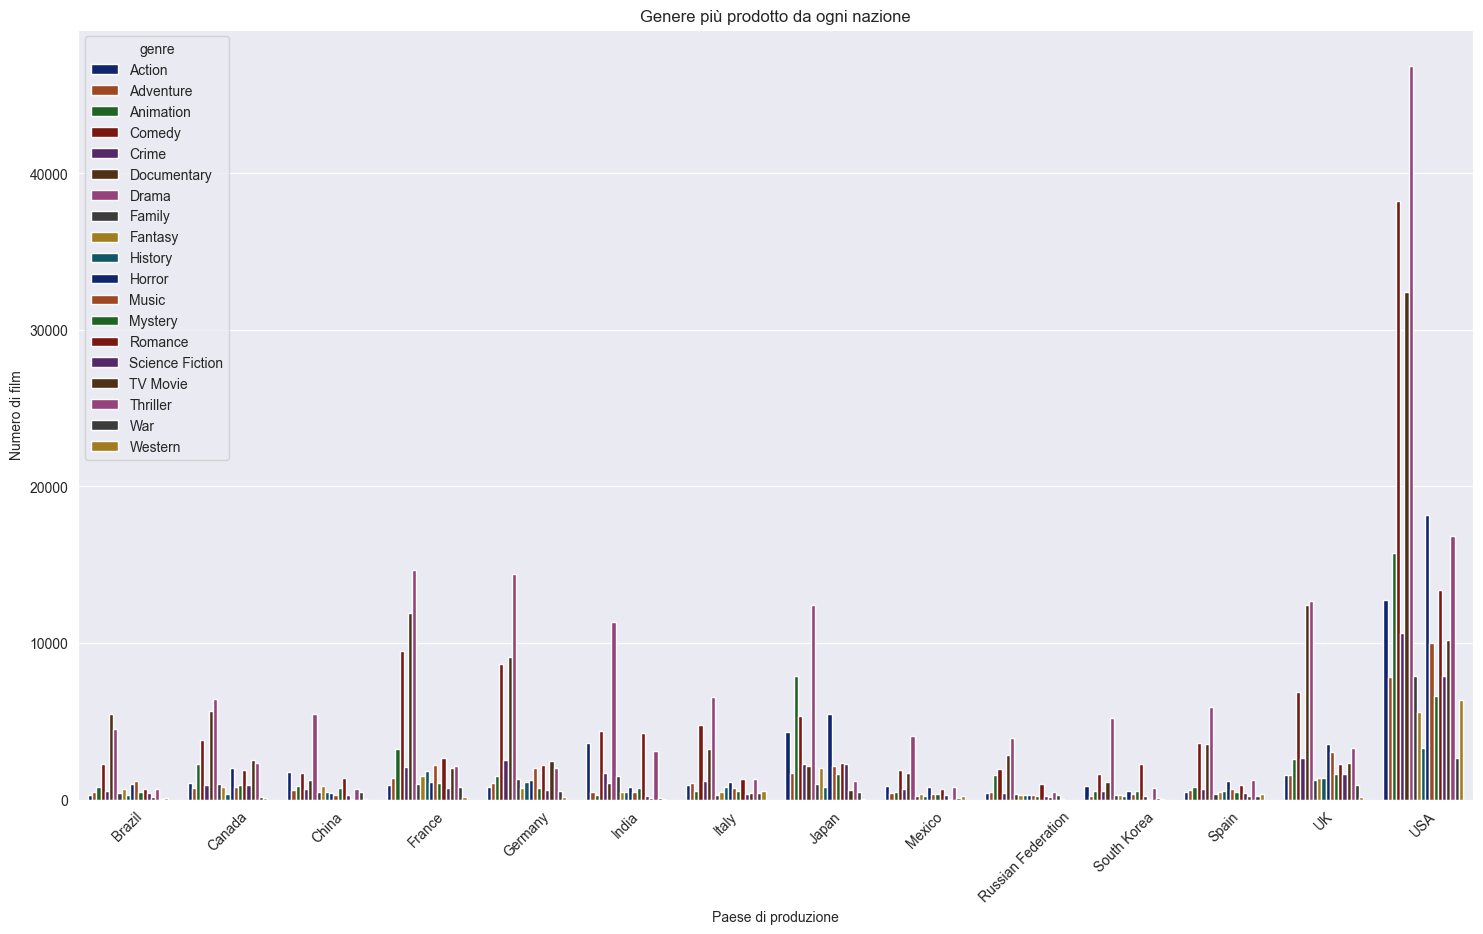

In [107]:
# quali generi sono stati prodotti maggiormente dalle varie nazioni?
best_producer_df = movies_w_genres_and_country_df.groupby(["country", "genre"]).size().reset_index(name = "n_film")
plt.figure(figsize = (18, 10))

ax = sns.barplot(data = best_producer_df, x = "country", y = "n_film", hue = "genre", palette = "dark")
plt.title("Genere più prodotto da ogni nazione")
plt.xlabel("Paese di produzione")
plt.ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()

##### calcoliamo anche la media dei generi per ogni paese di produzione

In [26]:
# da utilizzare in ausilio per il grafico precedente per una valutazione più accurata
movie_rating_per_country = movies_w_genres_and_country_df.groupby(["country", "genre"])["rating"].mean()
movie_rating_per_country

country  genre          
Brazil   Action             3.088491
         Adventure          3.103263
         Animation          3.290110
         Comedy             3.141832
         Crime              3.376000
                              ...   
USA      Science Fiction    2.899351
         TV Movie           3.035299
         Thriller           2.924657
         War                3.308542
         Western            3.270096
Name: rating, Length: 266, dtype: float64

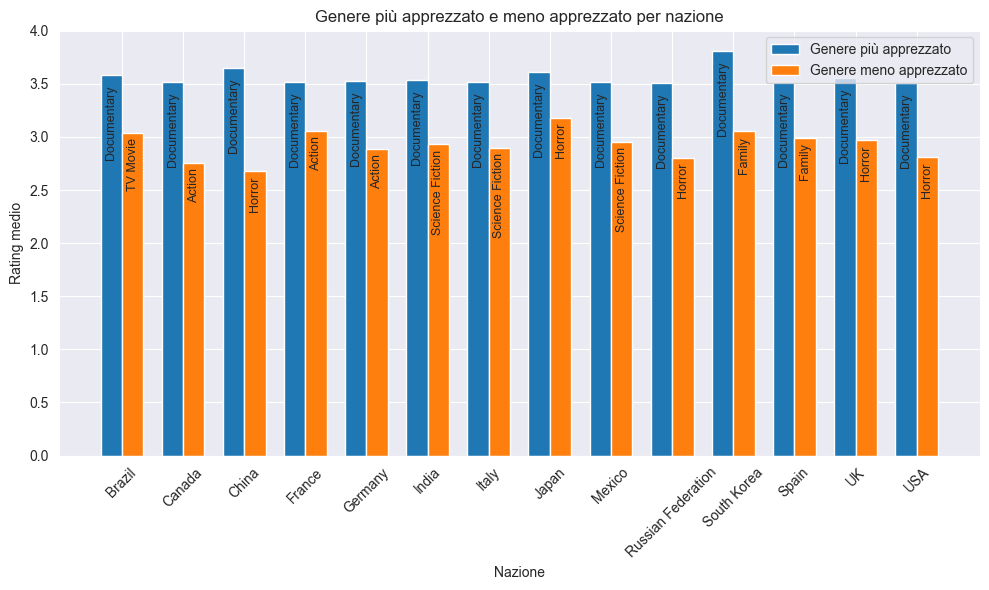

In [116]:
# adesso calcoliamo il genere più apprezzato e più detestato per ogni nazione
rating = movie_rating_per_country.reset_index()

# grazie a idxmax() idxmin() troviamo l'indice massimo e minimo
idx_best = rating.groupby("country")["rating"].idxmax()
idx_worst = rating.groupby("country")["rating"].idxmin()

# creaimo dei dataset con una nuova colonna grazie ad assign
best  = rating.loc[idx_best].assign(type="Best")
worst = rating.loc[idx_worst].assign(type="Worst")

# BLOCCO DI CODICE GENERATO CON L'AUSILIO DELL'AI -----------------------------
# 3. Prepara i dati per il plot
countries    = best['country'].values
n_countries  = len(countries)
positions    = np.arange(n_countries)
width        = 0.35

best_vals    = best.set_index('country').loc[countries]['rating']
worst_vals   = worst.set_index('country').loc[countries]['rating']
best_genres  = best.set_index('country').loc[countries]['genre']
worst_genres = worst.set_index('country').loc[countries]['genre']

# 4. Disegna le barre
plt.figure(figsize=(10,6))
bars_best  = plt.bar(positions - width/2, best_vals,  width, label='Genere più apprezzato')
bars_worst = plt.bar(positions + width/2, worst_vals, width, label='Genere meno apprezzato')

# 5. Annotazioni verticali
for bar, genre in zip(bars_best, best_genres):
    plt.text(
        bar.get_x() + bar.get_width()/2,          # x center
        bar.get_height() - 0.8,                  # y just above
        genre,                                    # text
        ha='center',                              # align center horizontally
        va='bottom',                              # align text baseline
        rotation=90,                              # rotate vertical
        fontsize=9
    )

for bar, genre in zip(bars_worst, worst_genres):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.05,
        genre,
        ha='center',
        va='top',
        rotation=90,
        fontsize=9
    )
# -------------------------------

plt.xticks(positions, countries, rotation=45)
plt.ylabel('Rating medio')
plt.xlabel('Nazione')
plt.title('Genere più apprezzato e meno apprezzato per nazione')
plt.legend()
plt.tight_layout()
plt.show()

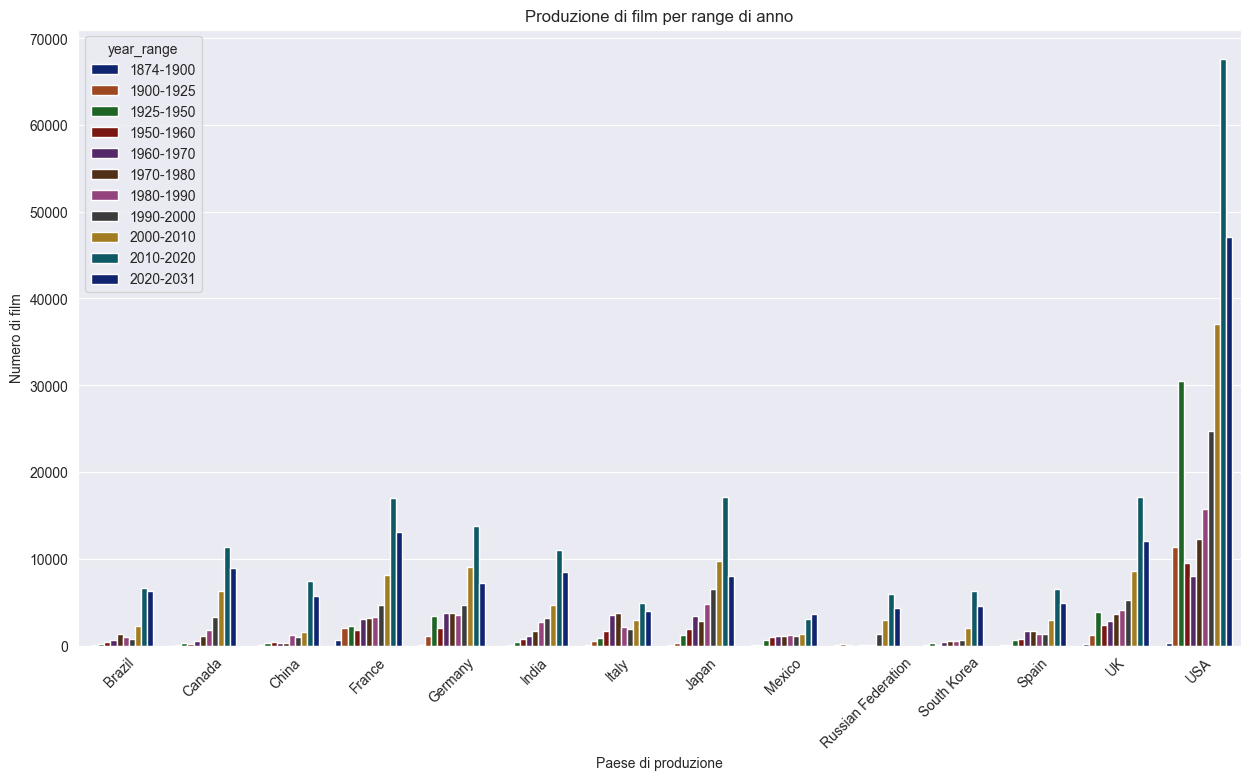

In [108]:
# in che range di anni ogni paese ha prodotto più film
df = movies_w_genres_and_country_df.groupby(["country", "year_range"], observed = True)["id"].size().reset_index(name = "n_films")
plt.figure(figsize = (15, 8))

ax = sns.barplot(data = df, x = "country", y = "n_films", hue = "year_range", palette = "dark")
plt.title("Produzione di film per range di anno")
plt.xlabel("Paese di produzione")
plt.ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()

##### al termine delle analisi esportiamo un primo dataset che include i generi e i paesi di produzione

In [109]:
movies_w_genres_and_country_df.to_csv("File_normalizzati/movies_w_genres_&_country.csv", index = False)

### Utilizzo del dataset Crew

In [30]:
crew_csv = pd.read_csv("Main_data/crew.csv")

# utilizziamo solo i produttori e i direttori per evitare di includere figure di second'ordine
crew_df = crew_csv[crew_csv["role"].isin(["Director", "Producer"])].reset_index(drop = True)
crew_df.rename(columns = {"name" : "name_role"}, inplace = True)
crew_df

id      role       name_role
0        1000001  Director    Greta Gerwig
1        1000001  Producer    Tom Ackerley
2        1000001  Producer   Margot Robbie
3        1000001  Producer  Robbie Brenner
4        1000001  Producer    David Heyman
...          ...       ...             ...
1467212  1941560  Producer    Wong Kar-wai
1467213  1941563  Director         Lin Sun
1467214  1941589  Director              田磊
1467215  1941596  Director         Marc Ma
1467216  1941596  Producer             朱子亮

[1467217 rows x 3 columns]

#### uniamo il dataframe precedente con il nuovo dataframe dei ruoli

In [31]:
movies_w_crew = pd.merge(crew_df, movies_w_genres_and_country_df, on = "id")
movies_w_crew.rename(columns = {"name" : "film_title"}, inplace = True)
movies_w_crew

id      role     name_role film_title    date  \
0        1000001  Director  Greta Gerwig     Barbie  2023.0   
1        1000001  Director  Greta Gerwig     Barbie  2023.0   
2        1000001  Director  Greta Gerwig     Barbie  2023.0   
3        1000001  Director  Greta Gerwig     Barbie  2023.0   
4        1000001  Producer  Tom Ackerley     Barbie  2023.0   
...          ...       ...           ...        ...     ...   
1674649  1941563  Director       Lin Sun        数到三     NaN   
1674650  1941596  Director       Marc Ma         重生     NaN   
1674651  1941596  Director       Marc Ma         重生     NaN   
1674652  1941596  Producer           朱子亮         重生     NaN   
1674653  1941596  Producer           朱子亮         重生     NaN   

                                               description  minute  rating  \
0        Barbie and Ken are having the time of their li...   114.0    3.86   
1        Barbie and Ken are having the time of their li...   114.0    3.86   
2        Barbie and Ken are having the time of their li...   114.0    3.86   
3        Barbie and Ken are having the time of their li...   114.0    3.86   
4        Barbie and Ken are having the time of their li...   114.0    3.86   
...                                                    ...     ...     ...   
1674649                                                NaN     NaN     NaN   
1674650  In a world where order has broken down, darkne...     NaN     NaN   
1674651  In a world where order has broken down, darkne...     NaN     NaN   
1674652  In a world where order has broken down, darkne...     NaN     NaN   
1674653  In a world where order has broken down, darkne...     NaN     NaN   

        country      genre year_range  
0            UK     Comedy  2020-2031  
1            UK  Adventure  2020-2031  
2           USA     Comedy  2020-2031  
3           USA  Adventure  2020-2031  
4            UK     Comedy  2020-2031  
...         ...        ...        ...  
1674649   China      Drama        NaN  
1674650   China     Action        NaN  
1674651   China      Crime        NaN  
1674652   China     Action        NaN  
1674653   China      Crime        NaN  

[1674654 rows x 11 columns]

##### analizziamo chi sono stati i direttori che hanno diretto più film

In [114]:
# creaimo un dataset con solo i direttori dei film
directors = movies_w_crew[(movies_w_crew["role"] == "Director")]

top_director = directors.groupby("name_role")["film_title"].nunique().reset_index(name = "n_films").sort_values("n_films", ascending = False).reset_index(drop = True).loc[0]
print(f"Il direttore che ha diretto più film è {top_director.name_role} con {top_director.n_films}")

directors.groupby("name_role")["film_title"].nunique().reset_index(name = "n_films").sort_values("n_films", ascending = False).reset_index(drop = True)


Il direttore che ha diretto più film è Dave Fleischer con 528


name_role  n_films
0                   Dave Fleischer      528
1              Gilbert M. Anderson      365
2                  Seymour Kneitel      339
3                     Friz Freleng      298
4                      Chuck Jones      284
...                            ...      ...
163295                         A&E        1
163296             Findlay Bunting        1
163297                  A-lan Holt        1
163298  "William" Zubricki-Vetrano        1
163299            Giovanni De Nava        0

[163300 rows x 2 columns]

##### analizziamo chi è il miglior e il peggior direttore

In [118]:
# calcoliamo la media del rating per ogni direttore
avg_ratings = directors.groupby("name_role")["rating"].mean().sort_values(ascending = False).reset_index(name = "avg_rating")

idx_best  = avg_ratings["avg_rating"].idxmax()
idx_worst = avg_ratings["avg_rating"].idxmin()

best  = avg_ratings.loc[idx_best]
worst = avg_ratings.loc[idx_worst]

print(f"Regista con la media di rating migliore: {best['name_role']} — {best['avg_rating']:.2f}")
print(f"Regista con la media di rating peggiore: {worst['name_role']} — {worst['avg_rating']:.2f}")

# che film ha diretto il miglior direttore
print(directors[directors["name_role"] == "Stuart Richardson"])

# date le analisi precedenti la probabilità che avesse diretto un documentario erano più alte in quanto i documentari sono la categoria più apprezzata

# di contro andiamo a controllare la categoria di film più disprezzata (horror) quindi ci aspettiamo che Ann abbia diretto dei film horror
directors[directors["name_role"] == "Ann Deborah Fishman"]
# l'analisi non ha rispecchiato le previsione ma comunque non ha diretto nessun film con il genere più apprezzato

Regista con la media di rating migliore: Stuart Richardson — 4.65
Regista con la media di rating peggiore: Ann Deborah Fishman — 1.09
            id      role          name_role  \
66738  1003224  Director  Stuart Richardson   

                                              film_title    date  \
66738  No Half Measures: Creating the Final Season of...  2013.0   

                                             description  minute  rating  \
66738  A documentary about the making of season five ...   135.0    4.65   

      country        genre year_range  
66738     USA  Documentary  2010-2020  


id      role            name_role          film_title    date  \
163359   1009106  Director  Ann Deborah Fishman              Swiped  2018.0   
163360   1009106  Director  Ann Deborah Fishman              Swiped  2018.0   
163361   1009106  Director  Ann Deborah Fishman              Swiped  2018.0   
966485   1180167  Director  Ann Deborah Fishman   Marriage Material  2014.0   
966486   1180167  Director  Ann Deborah Fishman   Marriage Material  2014.0   
966487   1180167  Director  Ann Deborah Fishman   Marriage Material  2014.0   
1611507  1783864  Director  Ann Deborah Fishman  Christmas Overtime     NaN   
1611508  1783864  Director  Ann Deborah Fishman  Christmas Overtime     NaN   

                                               description  minute  rating  \
163359   James, a college freshman and computer genius,...    93.0    1.09   
163360   James, a college freshman and computer genius,...    93.0    1.09   
163361   James, a college freshman and computer genius,...    93.0    1.09   
966485   Iris Carsen wants her daughter to find a man w...   103.0     NaN   
966486   Iris Carsen wants her daughter to find a man w...   103.0     NaN   
966487   Iris Carsen wants her daughter to find a man w...   103.0     NaN   
1611507  An unemployed actress is offered a commercial ...    92.0     NaN   
1611508  An unemployed actress is offered a commercial ...    92.0     NaN   

        country    genre year_range  
163359      USA  Romance  2010-2020  
163360      USA   Comedy  2010-2020  
163361      USA    Drama  2010-2020  
966485      USA   Family  2010-2020  
966486      USA   Comedy  2010-2020  
966487      USA  Romance  2010-2020  
1611507     USA   Comedy        NaN  
1611508     USA  Romance        NaN

##### analizziamo chi ha diretto più film per ogni genere

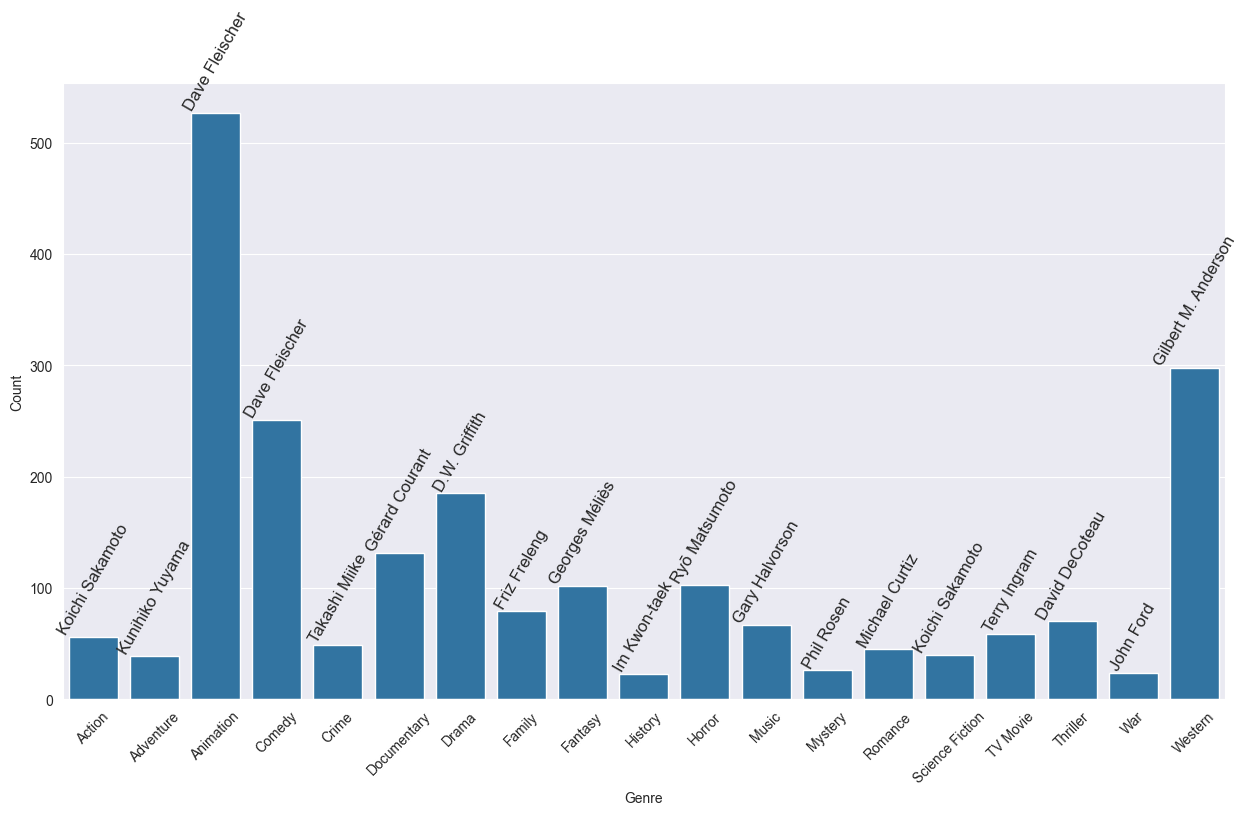

              genre            name_role  n_films
0            Action      Koichi Sakamoto       56
1         Adventure      Kunihiko Yuyama       39
2         Animation       Dave Fleischer      527
3            Comedy       Dave Fleischer      251
4             Crime        Takashi Miike       49
5       Documentary       Gérard Courant      131
6             Drama        D.W. Griffith      185
7            Family         Friz Freleng       79
8           Fantasy       Georges Méliès      102
9           History         Im Kwon-taek       23
10           Horror        Ryō Matsumoto      103
11            Music       Gary Halvorson       67
12          Mystery           Phil Rosen       26
13          Romance       Michael Curtiz       45
14  Science Fiction      Koichi Sakamoto       40
15         TV Movie         Terry Ingram       59
16         Thriller       David DeCoteau       70
17              War            John Ford       24
18          Western  Gilbert M. Anderson      298


In [34]:
gen_dir_count = directors.groupby(["genre", "name_role"])["film_title"].nunique().reset_index(name = "n_films")

idx_max = gen_dir_count.groupby("genre")["n_films"].idxmax()

top_directors_per_genre = (gen_dir_count.loc[idx_max].reset_index(drop=True).sort_values("genre"))

plt.figure(figsize = (15, 8))
ax = sns.barplot(data = top_directors_per_genre, x = "genre", y = "n_films")

# 3) Annotazioni: nome del regista sopra ogni barra
for patch, director in zip(ax.patches, top_directors_per_genre["name_role"]):
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        director,
        ha="center",
        va="bottom",
        rotation=60,
        fontsize=12
    )

plt.xlabel("Genere")
plt.ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()

print(top_directors_per_genre)

### Utilizzo del dataset Themes

In [35]:
themes_df = pd.read_csv("Main_data/themes.csv")
themes_df

id                                              theme
0       1000001                   Humanity and the world around us
1       1000001                             Crude humor and satire
2       1000001                        Moving relationship stories
3       1000001     Emotional and captivating fantasy storytelling
4       1000001  Surreal and thought-provoking visions of life ...
...         ...                                                ...
125636  1835643                         Noir and dark crime dramas
125637  1835643        Intriguing and suspenseful murder mysteries
125638  1849827                                 Faith and religion
125639  1849827                       Faith and spiritual journeys
125640  1849827              Religious faith, sin, and forgiveness

[125641 rows x 2 columns]

#### uniamo il dataset precedente di film con il nuovo dataset dei temi trattati dai film

In [36]:
# non utilizziamo il dataset con tutti i membri della crew ma ci concentriamo sui direttori del film
movies_w_themes = pd.merge(directors, themes_df, on = "id")
movies_w_themes

id      role       name_role    film_title    date  \
0       1000001  Director    Greta Gerwig        Barbie  2023.0   
1       1000001  Director    Greta Gerwig        Barbie  2023.0   
2       1000001  Director    Greta Gerwig        Barbie  2023.0   
3       1000001  Director    Greta Gerwig        Barbie  2023.0   
4       1000001  Director    Greta Gerwig        Barbie  2023.0   
...         ...       ...             ...           ...     ...   
432821  1835643  Director  Craig Viveiros  Angela Black  2021.0   
432822  1835643  Director  Craig Viveiros  Angela Black  2021.0   
432823  1835643  Director  Craig Viveiros  Angela Black  2021.0   
432824  1835643  Director  Craig Viveiros  Angela Black  2021.0   
432825  1835643  Director  Craig Viveiros  Angela Black  2021.0   

                                              description  minute  rating  \
0       Barbie and Ken are having the time of their li...   114.0    3.86   
1       Barbie and Ken are having the time of their li...   114.0    3.86   
2       Barbie and Ken are having the time of their li...   114.0    3.86   
3       Barbie and Ken are having the time of their li...   114.0    3.86   
4       Barbie and Ken are having the time of their li...   114.0    3.86   
...                                                   ...     ...     ...   
432821  Angela Black leads a seemingly idyllic life wi...   270.0     NaN   
432822  Angela Black leads a seemingly idyllic life wi...   270.0     NaN   
432823  Angela Black leads a seemingly idyllic life wi...   270.0     NaN   
432824  Angela Black leads a seemingly idyllic life wi...   270.0     NaN   
432825  Angela Black leads a seemingly idyllic life wi...   270.0     NaN   

       country   genre year_range  \
0           UK  Comedy  2020-2031   
1           UK  Comedy  2020-2031   
2           UK  Comedy  2020-2031   
3           UK  Comedy  2020-2031   
4           UK  Comedy  2020-2031   
...        ...     ...        ...   
432821      UK   Drama  2020-2031   
432822      UK   Drama  2020-2031   
432823      UK   Drama  2020-2031   
432824      UK   Drama  2020-2031   
432825      UK   Drama  2020-2031   

                                                    theme  
0                        Humanity and the world around us  
1                                  Crude humor and satire  
2                             Moving relationship stories  
3          Emotional and captivating fantasy storytelling  
4       Surreal and thought-provoking visions of life ...  
...                                                   ...  
432821                         Crime, drugs and gangsters  
432822                        Suspenseful crime thrillers  
432823                Twisted dark psychological thriller  
432824                         Noir and dark crime dramas  
432825        Intriguing and suspenseful murder mysteries  

[432826 rows x 12 columns]

##### qual è il tema più apprezzato

In [37]:
# come prima cosa vediamo quali sono i temi più utilizzati per i film
movies_w_themes.groupby("theme").size().reset_index(name = "n_films").sort_values("n_films", ascending = False)


theme  n_films
18                     Crude humor and satire    12254
70                Moving relationship stories    12057
55    Horror, the undead and monster classics    11728
100       Twisted dark psychological thriller    11564
45         Gory, gruesome, and slasher horror     9685
..                                        ...      ...
4              Air pilot heroism and survival      802
59          Inspiring sports underdog stories      720
101      Underdog fighting and boxing stories      422
93          Teen friendship and coming-of-age      249
30   Engaging, intense crime and casino drama      207

[109 rows x 2 columns]

In [38]:

themes_avg_rating = movies_w_themes.groupby("theme")["rating"].mean().sort_values(ascending = False).reset_index(name = "avg_rating")
# possiamo notare come i temi più graditi rispecchiano la categoria del genere infatti tra le prime posizioni troviamo dei temi drammatici e invece alle ultime posizioni troviamo temi horror
id_best_theme = themes_avg_rating["avg_rating"].idxmax()

best_theme = themes_avg_rating.loc[id_best_theme]
print(f"il tema più apprezzato è {best_theme.theme} con una media di {best_theme.avg_rating:.3f}")
themes_avg_rating

il tema più apprezzato è Humanity and the world around us con una media di 3.655


theme  avg_rating
0                     Humanity and the world around us    3.655326
1       Emotional and captivating fantasy storytelling    3.654733
2    Surreal and thought-provoking visions of life ...    3.621975
3                Tragic sadness and captivating beauty    3.618405
4                 Powerful poetic and passionate drama    3.581770
..                                                 ...         ...
104                Extreme gory horror and cannibalism    2.790802
105                              Bloody vampire horror    2.758870
106             Sci-fi monster and dinosaur adventures    2.745285
107                 Survival horror and zombie carnage    2.720505
108               Sci-fi horror, creatures, and aliens    2.702341

[109 rows x 2 columns]

##### il tema più apprezzato in che categoria di genere viene utilizzato maggiormente

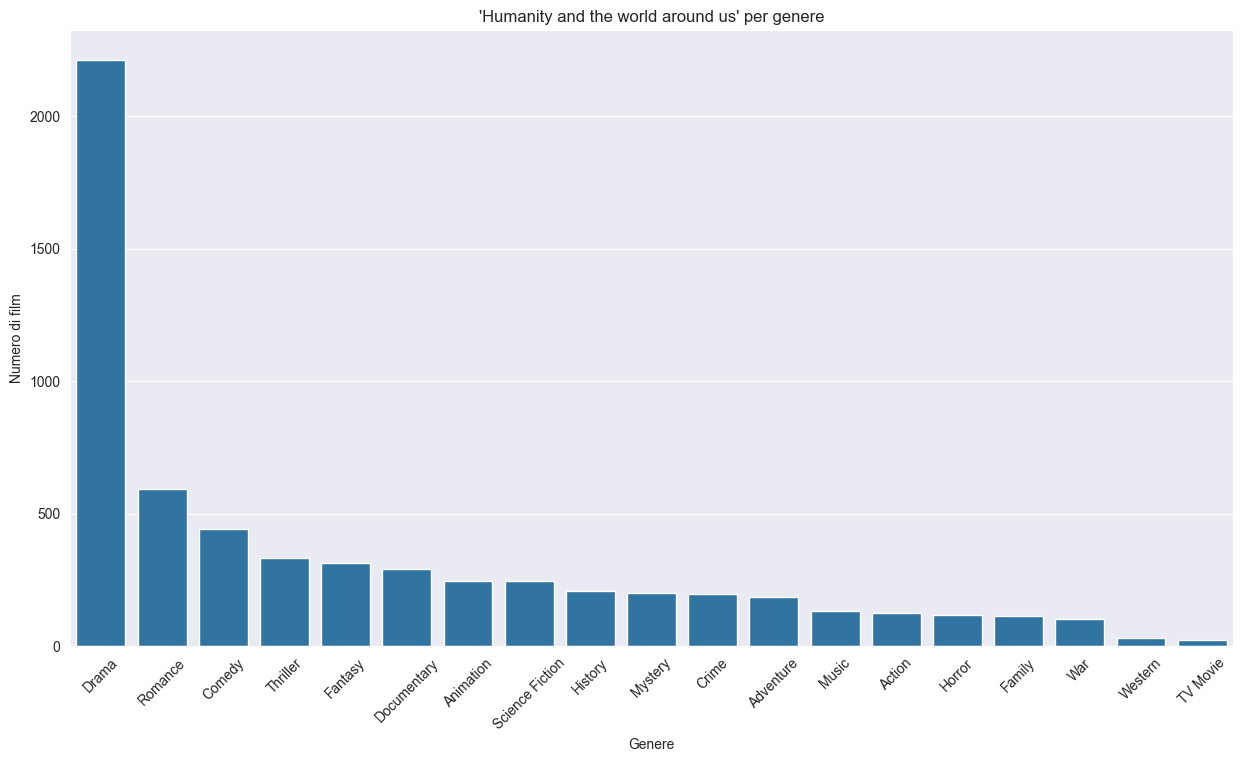

In [120]:
data_theme = movies_w_themes[movies_w_themes["theme"] == best_theme.theme].groupby("genre").size().reset_index(name = "n_films").sort_values("n_films", ascending = False)
plt.figure(figsize = (15, 8))
ax = sns.barplot(data = data_theme, x = "genre", y = "n_films")
plt.title(f"'{best_theme.theme}' per genere")
plt.xlabel("Genere")
plt.ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()

##### qual è il tema che dura di più

In [40]:
movies_w_themes.groupby("theme")["minute"].mean().reset_index(name = "avg_minutage").sort_values("avg_minutage", ascending = False)

# possiamo notare come il tema che ha una durata maggiore è anche uno dei più apprezzati come anche altri presenti in questa lista sono tra i più apprezzati

theme  avg_minutage
25   Emotional and captivating fantasy storytelling    209.802723
99            Tragic sadness and captivating beauty    191.380128
66              Lavish dramas and sumptuous royalty    164.113394
33                      Epic history and literature    162.992975
41        Fantasy adventure, heroism, and swordplay    160.542385
..                                              ...           ...
38           Fairy-tale fantasy and enchanted magic     95.807229
37              Extreme gory horror and cannibalism     95.290837
15  Chilling experiments and classic monster horror     94.199191
2        Adorable animals and heartwarming families     93.893673
54           Holiday joy and heartwarming Christmas     90.292725

[109 rows x 2 columns]

##### qual è il tema più utilizzato nei vari range di anno

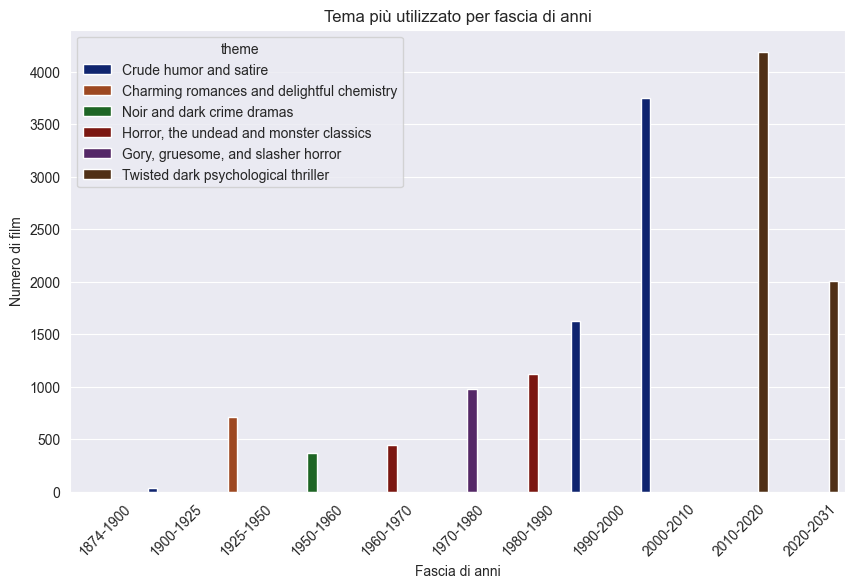

In [41]:

agg_count = (movies_w_themes.groupby(["year_range", "theme"], observed = True).size().reset_index(name="count"))

top_count = agg_count.loc[agg_count.groupby('year_range', observed = True)['count'].idxmax()]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_count,x="year_range", y="count", hue = "theme", order=labels, palette = "dark")
plt.xticks(rotation=45)
plt.title("Tema più utilizzato per fascia di anni")
plt.xlabel("Fascia di anni")
plt.ylabel("Numero di film")
plt.show()

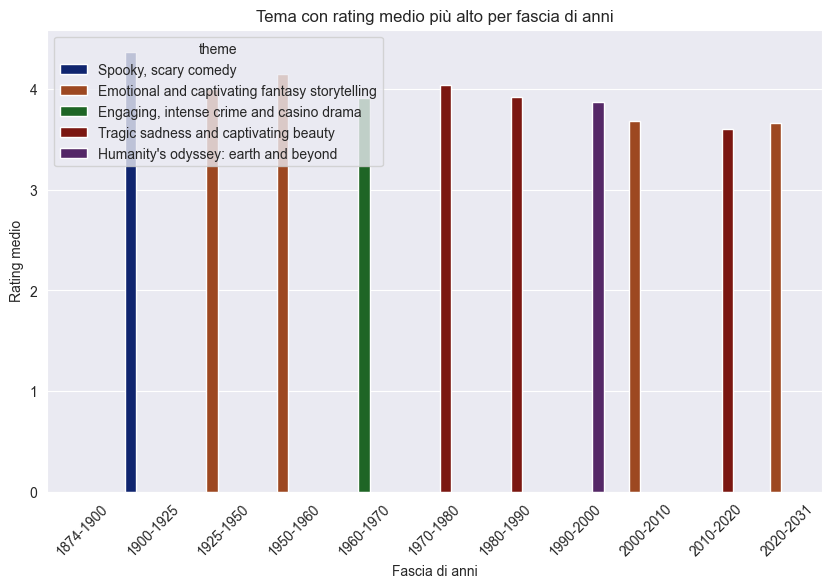

In [42]:
agg_rating = (movies_w_themes.groupby(["year_range", "theme"], observed= True)["rating"].mean().reset_index(name="avg_rating"))

idx = agg_rating.groupby("year_range", observed=True)["avg_rating"].idxmax()
idx = idx.dropna().astype(int)

top_rating = agg_rating.loc[idx].sort_values("year_range")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_rating,x="year_range", y="avg_rating", hue = "theme", palette = "dark")
plt.xticks(rotation=45)
plt.title("Tema con rating medio più alto per fascia di anni")
plt.xlabel("Fascia di anni")
plt.ylabel("Rating medio")
plt.show()

##### dato un determinato tema come varia il rating in base al minutaggio (scatterplot o violinplot)

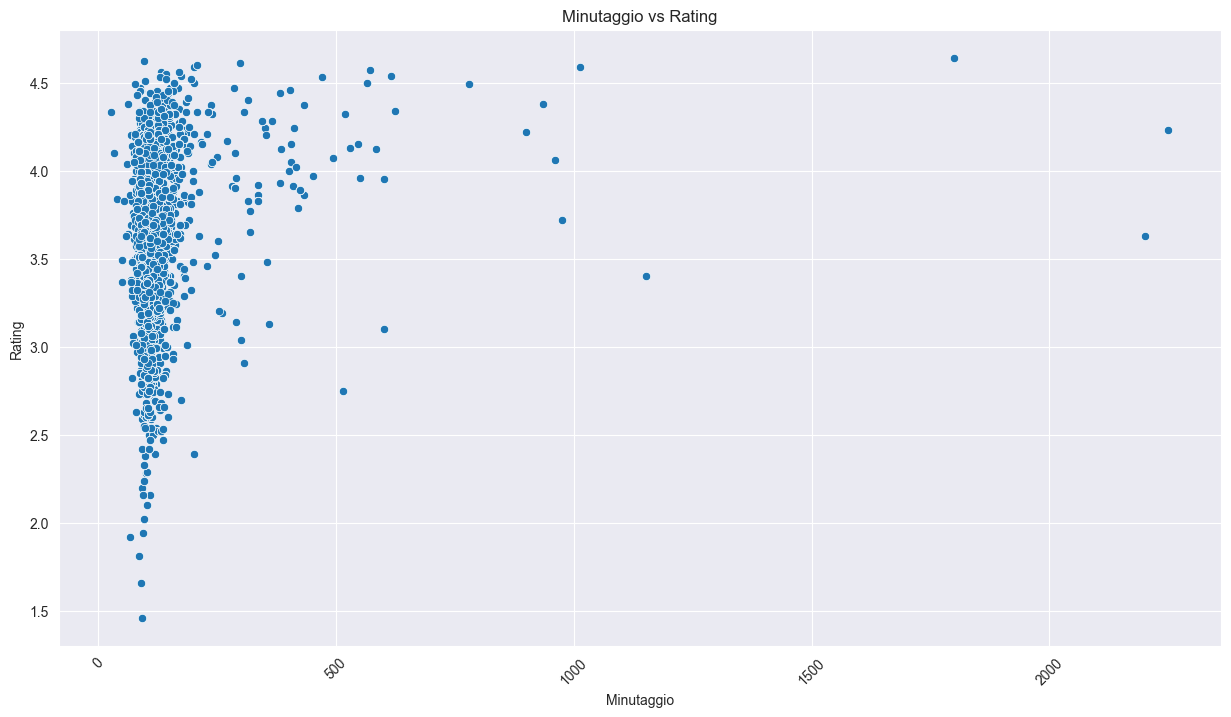

In [121]:
best_theme_rating = movies_w_themes[movies_w_themes["theme"] == best_theme.theme]
plt.figure(figsize = (15, 8))
ax = sns.scatterplot(data = best_theme_rating, x = "minute", y = "rating")
plt.title("Minutaggio vs Rating")
plt.xlabel("Minutaggio")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

C:\Users\Domenico\AppData\Local\Temp\ipykernel_11728\761640329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_theme_rating['minute_bin'] = pd.cut(best_theme_rating['minute'], bins=bins, labels=labels, right=False)


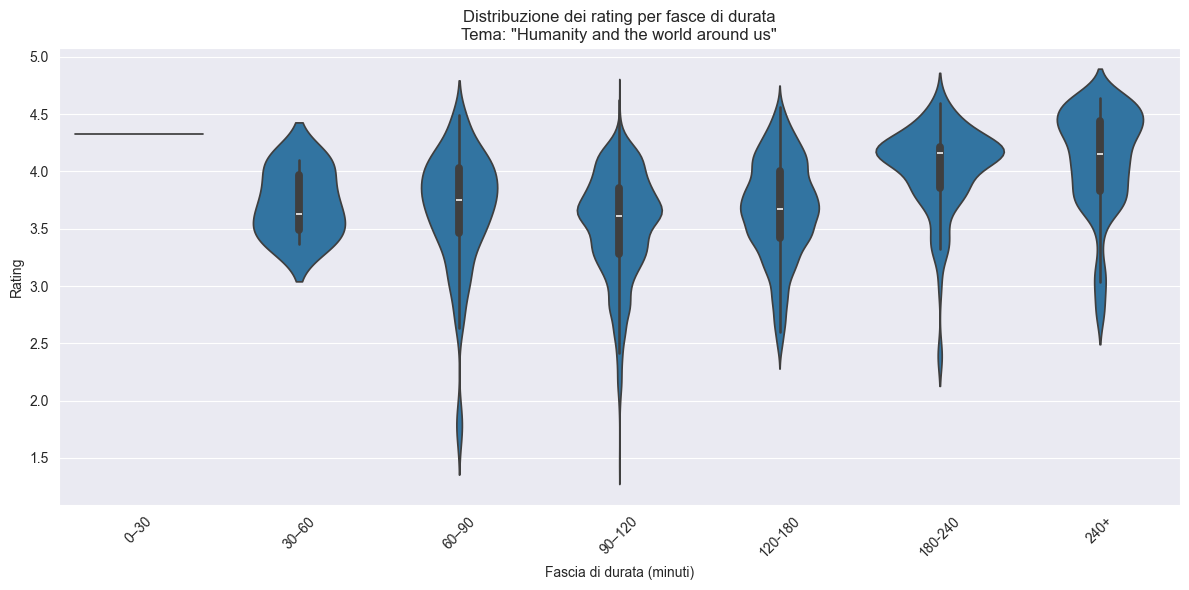

In [44]:
# proviamo a indicare ora la distribuzione dei vari rating per minutaggio con un violin plot
bins = [0, 30, 60, 90, 120, 180, 240, float('inf')]
labels = ['0–30', '30–60', '60–90', '90–120', '120-180', '180-240', '240+']

best_theme_rating['minute_bin'] = pd.cut(best_theme_rating['minute'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12,6))
ax = sns.violinplot(data=best_theme_rating,x='minute_bin',y='rating')          # non estende la curva oltre i dati)
plt.xticks(rotation=45)
plt.title(f'Distribuzione dei rating per fasce di durata\nTema: "{best_theme.theme}"')
plt.xlabel('Fascia di durata (minuti)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

##### nei periodi scanditi dalla guerra i film con il tema più utilizzati presentano la parola war o qualcosa di simile?

In [45]:
war_bins = [1914, 1918, 1925, 1930, 1935, 1940, 1945, 1950]
war_label = ["1914-1918", "1918-1925", "1925-1930", "1930-1935", "1935-1940", "1940-1945", "1945-1950"]

movies_w_themes_in_war = movies_w_themes[(movies_w_themes["date"] >= 1914) & (movies_w_themes["date"] <= 1950)]
movies_wartime_films = movies_w_themes_in_war.groupby(["theme"]).size().reset_index(name = "n_films").sort_values("n_films", ascending = False).reset_index(drop = True)
# selezioniamo i primi 30 temi per numero di film
top_30_wartime = movies_wartime_films.head(30)

In [46]:
# BLOCCO DI CODICE GENERATO CON L'AUSILIO DELL'AI -----------------------------
import re

# Supponendo che `top30` sia il DataFrame con i tuoi primi 30 temi:

keywords = ["war", "military", "battle", "conflict"]    # aggiungere altre keywords inerenti alla guerra
# costruisce una regex tipo r"\b(?:war|military|battle|conflict)\b"
pattern = r"\b(?:" + "|".join(keywords) + r")\b"

# mask True su tutte le righe il cui tema contiene almeno una di quelle parole, case‐insensitive
mask = top_30_wartime['theme'].str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)

# estrai solo i temi corrispondenti
matched = top_30_wartime.loc[mask, 'theme']
print("Temi che contengono una delle parole chiave:", matched.tolist())

Temi che contengono una delle parole chiave: ['War and historical adventure', 'Military combat and heroic soldiers', 'Nazis and World War II', 'Bravery in War']


##### i temi che rispecchiano la guerra in questo periodo hanno riscosso un rating alto?

In [47]:
movies_wartime_rating = movies_w_themes_in_war.groupby("theme")["rating"].mean().reset_index(name = "avg_rating").sort_values("avg_rating", ascending = False).reset_index(drop = True)
mask_rating_war = movies_wartime_rating['theme'].str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)
movies_wartime_rating.loc[mask_rating_war, ['theme', "avg_rating"]]

# possiamo notare come in questo periodo la media dei film a tema bellico sia superiore a quella totale (3.38) probabilmente dovuta all'empatia e al coinvolgimento del pubblico per un temo allora attuale

theme  avg_rating
50          War and historical adventure    3.471578
53                Nazis and World War II    3.464985
54   Military combat and heroic soldiers    3.462058
55  Political drama, patriotism, and war    3.454085
58                        Bravery in War    3.440038

## Utilizzo del dataset Language

In [48]:
languages_df = pd.read_csv("Main_data/languages.csv")
movies_w_languages = pd.merge(directors, languages_df, on = "id")
movies_w_languages

id      role     name_role  \
0        1000001  Director  Greta Gerwig   
1        1000001  Director  Greta Gerwig   
2        1000001  Director  Greta Gerwig   
3        1000001  Director  Greta Gerwig   
4        1000002  Director  Bong Joon-ho   
...          ...       ...           ...   
1012529  1941541  Director   Zhang Yimou   
1012530  1941541  Director   Zhang Yimou   
1012531  1941563  Director       Lin Sun   
1012532  1941596  Director       Marc Ma   
1012533  1941596  Director       Marc Ma   

                                     film_title    date  \
0                                        Barbie  2023.0   
1                                        Barbie  2023.0   
2                                        Barbie  2023.0   
3                                        Barbie  2023.0   
4                                      Parasite  2019.0   
...                                         ...     ...   
1012529  Zhang Yimou's Three-Body Problem Movie     NaN   
1012530  Zhang Yimou's Three-Body Problem Movie     NaN   
1012531                                     数到三     NaN   
1012532                                      重生     NaN   
1012533                                      重生     NaN   

                                               description  minute  rating  \
0        Barbie and Ken are having the time of their li...   114.0    3.86   
1        Barbie and Ken are having the time of their li...   114.0    3.86   
2        Barbie and Ken are having the time of their li...   114.0    3.86   
3        Barbie and Ken are having the time of their li...   114.0    3.86   
4        All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
...                                                    ...     ...     ...   
1012529                                Based on the novel.     NaN     NaN   
1012530                                Based on the novel.     NaN     NaN   
1012531                                                NaN     NaN     NaN   
1012532  In a world where order has broken down, darkne...     NaN     NaN   
1012533  In a world where order has broken down, darkne...     NaN     NaN   

             country            genre year_range              type language  
0                 UK           Comedy  2020-2031          Language  English  
1                 UK        Adventure  2020-2031          Language  English  
2                USA           Comedy  2020-2031          Language  English  
3                USA        Adventure  2020-2031          Language  English  
4        South Korea           Comedy  2010-2020  Primary language   Korean  
...              ...              ...        ...               ...      ...  
1012529        China  Science Fiction        NaN          Language  English  
1012530          USA  Science Fiction        NaN          Language  English  
1012531        China            Drama        NaN          Language  Chinese  
1012532        China           Action        NaN          Language  Chinese  
1012533        China            Crime        NaN          Language  Chinese  

[1012534 rows x 13 columns]

##### breve analisi del dataset languages

In [129]:
print(languages_df.shape)
print(languages_df.columns)
print(languages_df["language"].unique())

(1038762, 3)
Index(['id', 'type', 'language'], dtype='object')
['English' 'Korean' 'German' 'Cantonese' 'Chinese' 'Dutch' 'Spanish'
 'French' 'Japanese' 'Swedish' 'Swahili' 'Portuguese' 'Hindi' 'Italian'
 'Tagalog' 'Xhosa' 'Latin' 'Russian' 'Finnish' 'Hungarian' 'Somali'
 'Romanian' 'Vietnamese' 'Turkish' 'Czech' 'Estonian' 'Persian\xa0(Farsi)'
 'Urdu' 'Arabic' 'Polish' 'Hebrew\xa0(modern)' 'Greek\xa0(modern)'
 'Yiddish' 'Norwegian' 'Haitian, Haitian Creole' 'Khmer' 'Nepali' 'Akan'
 'Icelandic' 'Malay' 'Eastern Punjabi, Eastern Panjabi' 'Georgian'
 'Indonesian' 'Belarusian' 'Danish' 'Tamil' 'Sinhalese, Sinhala'
 'Tibetan Standard, Tibetan, Central' 'Armenian' 'Thai' 'Telugu'
 'Scottish Gaelic, Gaelic' 'Northern Sami' 'Esperanto' 'Bulgarian'
 'Afrikaans' 'Chichewa, Chewa, Nyanja' 'Southern Sotho' 'Zulu' 'Irish'
 'Breton' 'Croatian' 'Bengali, Bangla' 'Welsh' 'Navajo, Navaho' 'Albanian'
 'Inuktitut' 'Catalan' 'Quechua' 'Azerbaijani' 'Samoan' 'Ukrainian'
 'Mongolian' 'Māori' 'Tatar' 'Mayan

##### quante occorrenze per ciascuna lingua

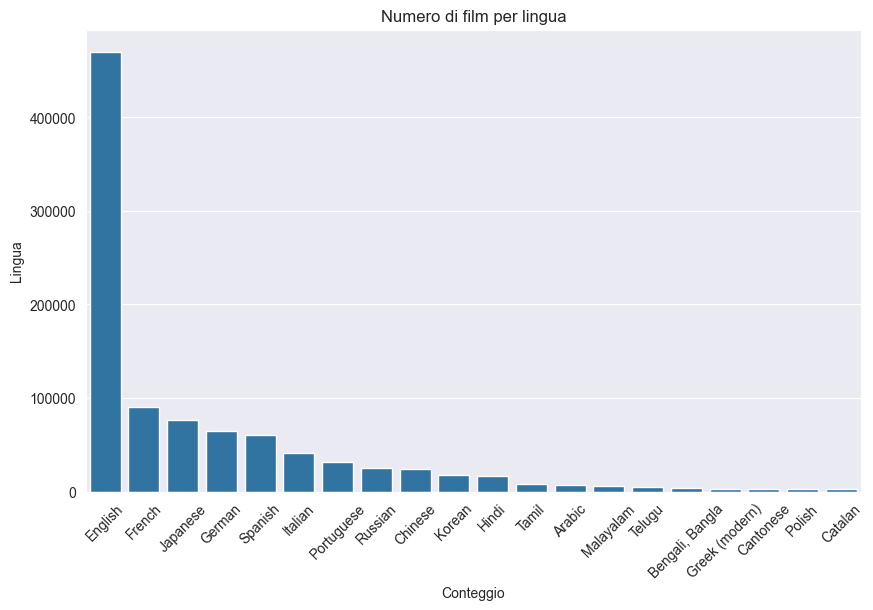

In [130]:
# notiamo subito che le lingue del dataset sono moltissime quindi riduciamo il dataset utilizzando solo le 20 lingue più usate
top_20_languages = movies_w_languages["language"].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
ax = sns.barplot(data = top_20_languages)
plt.title("Numero di film per lingua")
plt.xlabel("Conteggio")
plt.xticks(rotation = 45)
plt.ylabel("Lingua")
plt.show()


In [131]:
# otteniamo il dataset complete con tutte le colonne
movies_w_top_20_languages = movies_w_languages[movies_w_languages["language"].isin(top_20_languages.index.tolist())]
movies_w_top_20_languages

id      role     name_role  \
0        1000001  Director  Greta Gerwig   
1        1000001  Director  Greta Gerwig   
2        1000001  Director  Greta Gerwig   
3        1000001  Director  Greta Gerwig   
4        1000002  Director  Bong Joon-ho   
...          ...       ...           ...   
1012529  1941541  Director   Zhang Yimou   
1012530  1941541  Director   Zhang Yimou   
1012531  1941563  Director       Lin Sun   
1012532  1941596  Director       Marc Ma   
1012533  1941596  Director       Marc Ma   

                                     film_title    date  \
0                                        Barbie  2023.0   
1                                        Barbie  2023.0   
2                                        Barbie  2023.0   
3                                        Barbie  2023.0   
4                                      Parasite  2019.0   
...                                         ...     ...   
1012529  Zhang Yimou's Three-Body Problem Movie     NaN   
1012530  Zhang Yimou's Three-Body Problem Movie     NaN   
1012531                                     数到三     NaN   
1012532                                      重生     NaN   
1012533                                      重生     NaN   

                                               description  minute  rating  \
0        Barbie and Ken are having the time of their li...   114.0    3.86   
1        Barbie and Ken are having the time of their li...   114.0    3.86   
2        Barbie and Ken are having the time of their li...   114.0    3.86   
3        Barbie and Ken are having the time of their li...   114.0    3.86   
4        All unemployed, Ki-taek's family takes peculia...   133.0    4.56   
...                                                    ...     ...     ...   
1012529                                Based on the novel.     NaN     NaN   
1012530                                Based on the novel.     NaN     NaN   
1012531                                                NaN     NaN     NaN   
1012532  In a world where order has broken down, darkne...     NaN     NaN   
1012533  In a world where order has broken down, darkne...     NaN     NaN   

             country            genre year_range              type language  
0                 UK           Comedy  2020-2031          Language  English  
1                 UK        Adventure  2020-2031          Language  English  
2                USA           Comedy  2020-2031          Language  English  
3                USA        Adventure  2020-2031          Language  English  
4        South Korea           Comedy  2010-2020  Primary language   Korean  
...              ...              ...        ...               ...      ...  
1012529        China  Science Fiction        NaN          Language  English  
1012530          USA  Science Fiction        NaN          Language  English  
1012531        China            Drama        NaN          Language  Chinese  
1012532        China           Action        NaN          Language  Chinese  
1012533        China            Crime        NaN          Language  Chinese  

[960298 rows x 13 columns]

##### distribuzione dei rating per le top 20 lingue

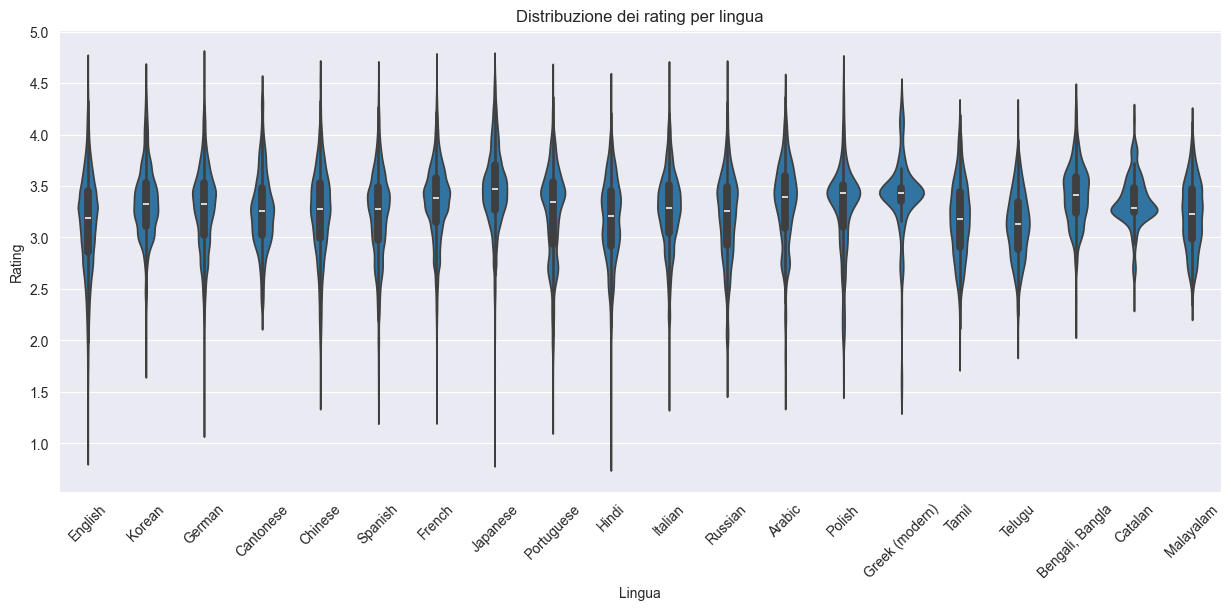

In [134]:
plt.figure(figsize=(15,6))
ax = (sns.violinplot(data=movies_w_top_20_languages, x="language", y="rating"))
plt.xticks(rotation=45)
plt.title("Distribuzione dei rating per lingua")
plt.xlabel("Lingua")
plt.ylabel("Rating")
plt.show()

##### generi più frequenti per ciascuna lingua

In [52]:
# creo una tabella di contingenza tra la lingua dei film e il genere
genre_lang = pd.crosstab(movies_w_top_20_languages["language"], movies_w_top_20_languages["genre"])


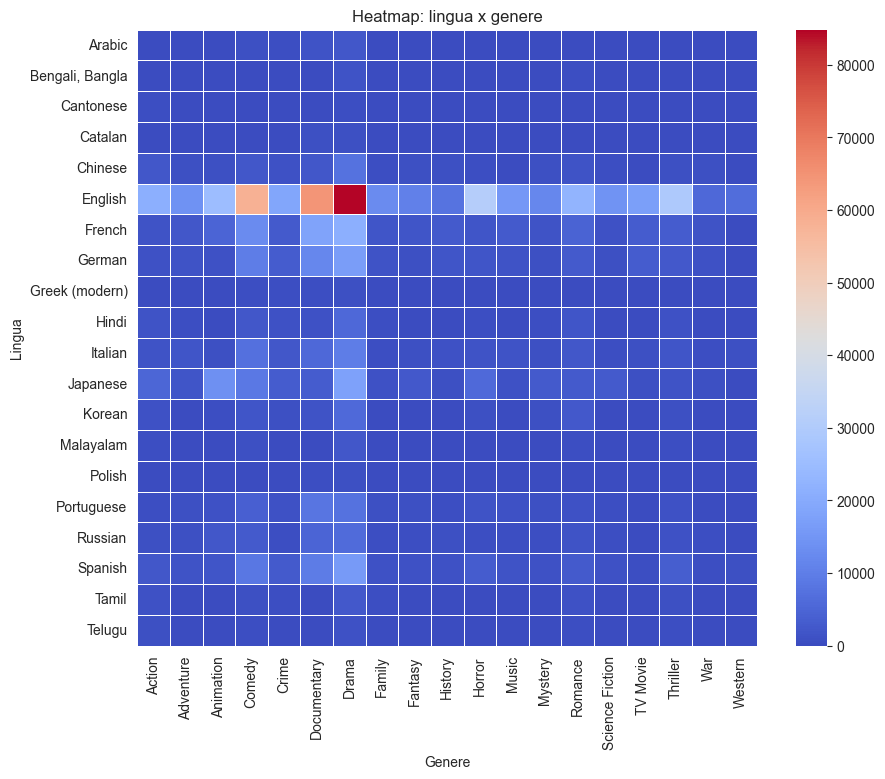

In [53]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(genre_lang, linewidths=.5, cmap = 'coolwarm')
plt.title("Heatmap: lingua x genere")
plt.xlabel("Genere")
plt.ylabel("Lingua")
plt.show()

##### evoluzione nel tempo dell'utilizzo della lingua

In [135]:

lang_year = (movies_w_top_20_languages.groupby(["language","year_range"], observed = False).size().reset_index(name="count"))


In [55]:

fig = px.line(
    lang_year,
    x="year_range",
    y="count",
    color="language",
    hover_name="language",
    hover_data={"year_range":True, "count":True},
    labels={
        "year": "Anno",
        "count": "Numero di film",
        "language": "Lingua"
    },
    title="Evoluzione del numero di uscite per lingua"
)

fig.update_traces(mode="lines+markers")

fig.update_layout(legend_title_text="Lingua", width = 800, height = 1000)


fig.show()

#### a questo punto possiamo generare un altro csv per poterlo studiare in seguito

In [160]:
movies_w_top_20_languages.to_csv("File_normalizzati/movies_w_top_20_languages.csv", index = False)

### Utilizziamo il dataset studios

In [56]:
studios_df = pd.read_csv("Main_data/studios.csv")
studios_df

id                   studio
0       1000001  LuckyChap Entertainment
1       1000001             Heyday Films
2       1000001           NB/GG Pictures
3       1000001                   Mattel
4       1000001    Warner Bros. Pictures
...         ...                      ...
679278  1941596               上海猫眼影业有限公司
679279  1941596            坏小子（北京）传媒有限公司
679280  1941596         亚太国影（重庆）文化传媒有限公司
679281  1941596               凤凰传奇影业有限公司
679282  1941596             无双（深圳）影业有限公司

[679283 rows x 2 columns]

##### analizziamo il dataset studios

In [136]:
print(studios_df.shape)
print(studios_df.columns)
print(studios_df["studio"].unique())

(679283, 2)
Index(['id', 'studio'], dtype='object')
['LuckyChap Entertainment' 'Heyday Films' 'NB/GG Pictures' ...
 'Lo Vi Films' '坏小子（北京）传媒有限公司' '亚太国影（重庆）文化传媒有限公司']


##### qual è il rating medio per i top 20 studi di produzione

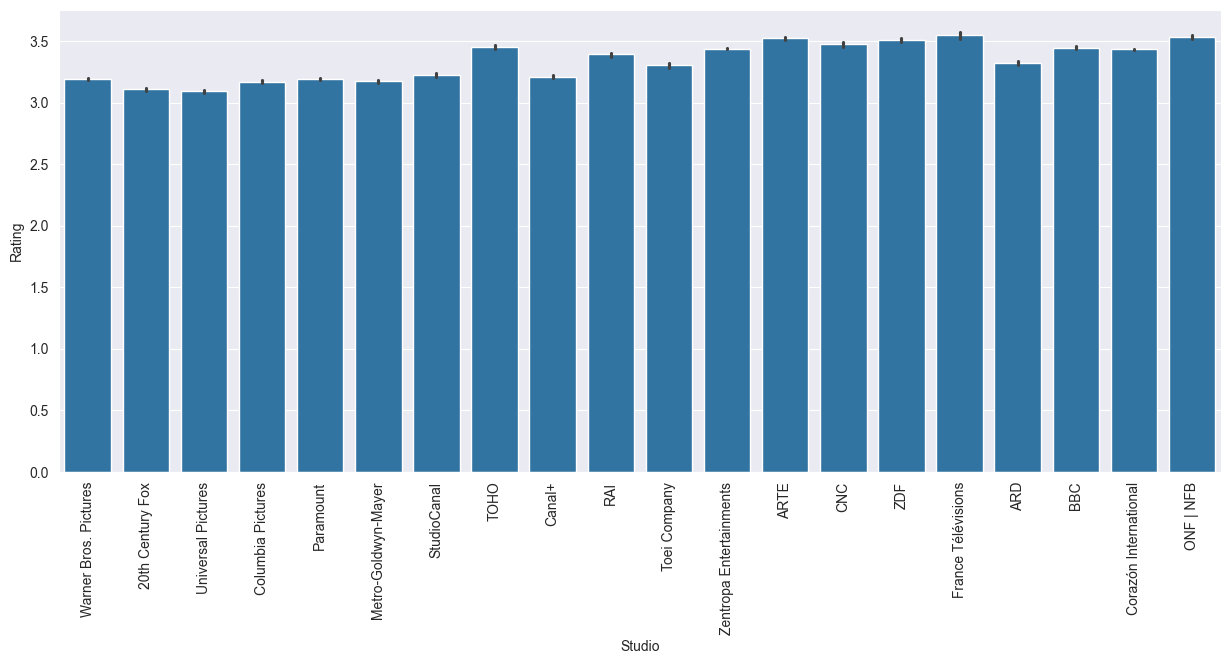

In [57]:
movies_w_studios_df = pd.merge(movies_w_top_20_languages, studios_df, on = "id")
# siccome anche gli studi di produzione sono molti, prendiamo in esame solo i primi venti per numero di produzione
top_20_studios = movies_w_studios_df["studio"].value_counts().nlargest(20)

movies_w_top_20_studios = movies_w_studios_df[movies_w_studios_df["studio"].isin(top_20_studios.index.tolist())]

plt.figure(figsize = (15, 6))
ax = sns.barplot(data = movies_w_top_20_studios, x = "studio", y = "rating")
plt.xlabel("Studio")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()



##### quali sono le lingue utilizzate dai top 20 studios

In [150]:
studio_lang_ct = pd.crosstab(
    movies_w_top_20_studios["studio"],
    movies_w_top_20_studios["language"]
)

# Per vedere solo le prime colonne (lingue) più usate
top_langs = movies_w_top_20_studios["language"].value_counts().index
studio_lang_ct[top_langs]

language                 English  French  German  Japanese  Italian  Spanish  \
studio                                                                         
20th Century Fox            5446     301     192       144      286      287   
ARD                          258     144    3077         2       66       37   
ARTE                        2395    3650    3096        97      347      321   
BBC                         6943     209     202        31       58       67   
CNC                          676    2341     149       127      125      146   
Canal+                      2268    3504     362        61      422      472   
Columbia Pictures           7238     330     264        99      229      439   
Corazón International        796     375     442         0      375      395   
France Télévisions           804    2512     206        31      105      100   
Metro-Goldwyn-Mayer         6593     375     192        86      397      254   
ONF | NFB                   2693     969      15        12       15       24   
Paramount                   6644     366     239        39      229      309   
RAI                          862     396     252        36     2324      119   
StudioCanal                 1902    1076     209        86      161      241   
TOHO                         382     222      96      3659      146        9   
Toei Company                 197       0      11      4397        8       11   
Universal Pictures          6983     336     221        57      209      395   
Warner Bros. Pictures       8513     425     258       369      203      355   
ZDF                         1760     611    4213        77      271      264   
Zentropa Entertainments      919     396     395         0      407      400   

language                 Portuguese  Russian  Arabic  Polish  Greek (modern)  \
studio                                                                         
20th Century Fox                 49      114      98      14              15   
ARD                              12       30       7      17              11   
ARTE                            119      296     120      84              32   
BBC                              33       69      29       9               6   
CNC                              58      116     159      28              18   
Canal+                          122      198     134      53              26   
Columbia Pictures                61      140      20      19              24   
Corazón International           375        0      10     375             387   
France Télévisions               52       30      19      11              14   
Metro-Goldwyn-Mayer              47       76      31      24               0   
ONF | NFB                        11        4      19       4               2   
Paramount                        52      141      62      12              13   
RAI                              37       84      60      33              36   
StudioCanal                      61       95     148      16              12   
TOHO                              3       13      30      40               0   
Toei Company                      3       11       0       0               0   
Universal Pictures              117      177     126      12              28   
Warner Bros. Pictures           119       98      30       0               4   
ZDF                             129      112     106      42              47   
Zentropa Entertainments         388        5       7     375             375   

language                 Chinese  Cantonese  Hindi  Korean  Catalan  \
studio                                                                
20th Century Fox              92         10     12      11        0   
ARD                            3          0      0       0        0   
ARTE                          62          3     16      19       16   
BBC                           26          2     25       5       18   
CNC                           33         39     57  

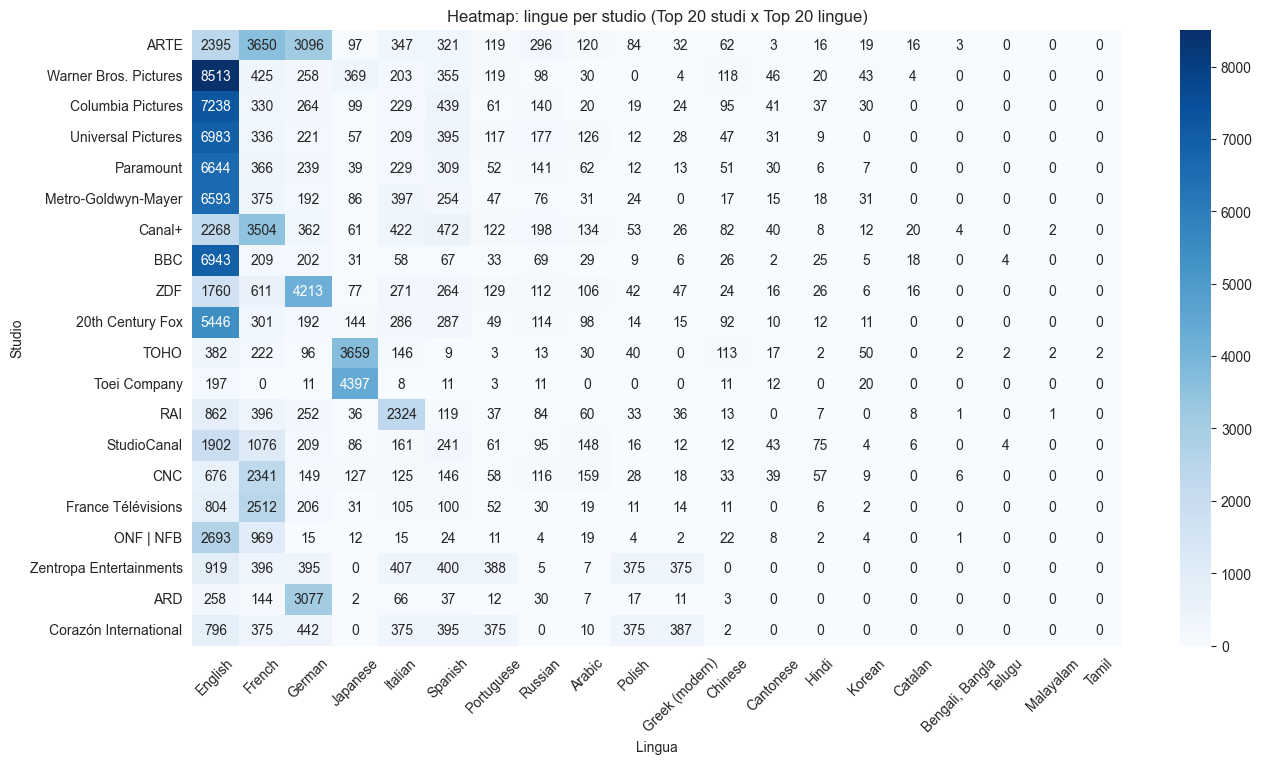

In [151]:
# Selezione primi 20 studi per numero totale di film
top_studios = movies_w_top_20_studios["studio"].value_counts().index
subset_lang = studio_lang_ct.loc[top_studios, top_langs]

# con questa matrice siamo in grado di capire l'origine della casa di produzione

plt.figure(figsize=(15,8))
ax = sns.heatmap(subset_lang, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: lingue per studio (Top 20 studi x Top 20 lingue)")
plt.xlabel("Lingua")
plt.ylabel("Studio")
plt.xticks(rotation = 45)
plt.show()

##### quali sono i generi più prodotti da i top 20 studios

In [153]:
studio_gen_ct = pd.crosstab(
    movies_w_top_20_studios["studio"],
    movies_w_top_20_studios["genre"]
)

top_langs = movies_w_top_20_studios["genre"].value_counts().index
studio_gen_ct[top_langs]


genre                    Drama  Documentary  Comedy  Romance  Action  Crime  \
studio                                                                        
20th Century Fox          1199           45    1003      573     650    407   
ARD                       1089          109     762      335      32    125   
ARTE                      1311         5037     302      203      12    153   
BBC                       1633         2043     466      145     131    238   
CNC                       1261          684     379      252      49     82   
Canal+                    2153          409    1144      506     371    400   
Columbia Pictures         1497           37    1525      666     847    631   
Corazón International     1179         1130    1160        3       0     16   
France Télévisions         566         1471     216       75      17    156   
Metro-Goldwyn-Mayer       1561          195    1335      953     468    497   
ONF | NFB                  280         1938     171       28       1     16   
Paramount                 1489          121    1406      815     646    460   
RAI                       1477          468     390      220      59    114   
StudioCanal               1216           98     585      347     234    186   
TOHO                       984           31     587      317     446    232   
Toei Company              1039           13     361      107     954    526   
Universal Pictures        1305          100    1334      658     855    571   
Warner Bros. Pictures     1725          145    1623      810     899    688   
ZDF                       1812         2164     571      309      43    377   
Zentropa Entertainments   1238         1158    1158       28       0     24   

genre                    Thriller  Adventure  TV Movie  History  Animation  \
studio                                                                       
20th Century Fox              566        607        13      149        102   
ARD                           108         67       669       84          0   
ARTE                          149         47      1384     1121        142   
BBC                           133        306      1072      312         88   
CNC                           149        132       185      132        215   
Canal+                        609        363       113      304        156   
Columbia Pictures             582        699         4      155        309   
Corazón International           0          0         0       20          0   
France Télévisions             62         28       441      330         37   
Metro-Goldwyn-Mayer           485        509        13      215        218   
ONF | NFB                       4         31        23       95        948   
Paramount                     555        540        35      149        174   
RAI                           167        158       249      331         68   
StudioCanal                   373        219        10      111        104   
TOHO                          103        227         8       69        665   
Toei Company                  101        346        18      133        121   
Universal Pictures            800        575        22      145        172   
Warner Bros. Pictures         640        614        12      164        759   
ZDF                           258         90       708      479         86   
Zentropa Entertainments        27          2         0        4          3   

genre                    Music  Science Fiction  War  Mystery  Family  \
studio                                                                  
20th Century Fox           173              356  246      242     219   
ARD                         56               15   16       29     148   
ARTE                       473               34  144       51      33   
BBC                        357              318  117      150      89   
CNC                         45               73   99       71      82   
Canal+                     140   

##### con una matrice heatmap studiamo i generi che ogni studio di produzione ha prodotto di più

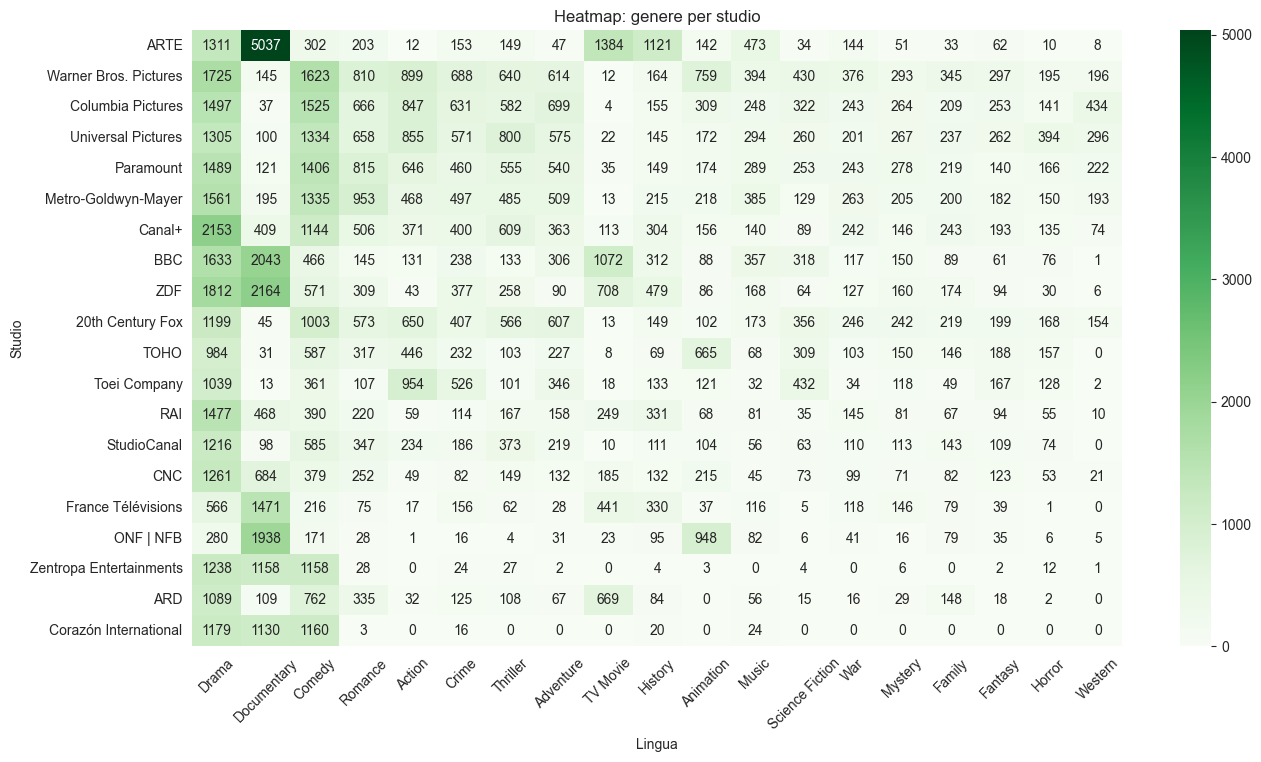

In [154]:
# Selezione primi 20 studi per numero totale di film
top_studios = movies_w_top_20_studios["studio"].value_counts().index
subset_gen = studio_gen_ct.loc[top_studios, top_langs]

plt.figure(figsize=(15,8))
ax = sns.heatmap(subset_gen, annot=True, fmt="d", cmap="Greens")
plt.title("Heatmap: genere per studio")
plt.xlabel("Lingua")
plt.ylabel("Studio")
plt.xticks(rotation = 45)
plt.show()

##### calcolare il rating del genere che è stato prodotto da i top 20 studios

In [63]:
# calcoliamo la media dei valori di rating per ogni indice (studio) e colonna (genere).
rating_pivot = pd.pivot_table(
    movies_w_top_20_studios,
    index="studio",
    columns="genre",
    values= "rating",
    aggfunc="mean"
)

subset_rating = rating_pivot.loc[top_studios]

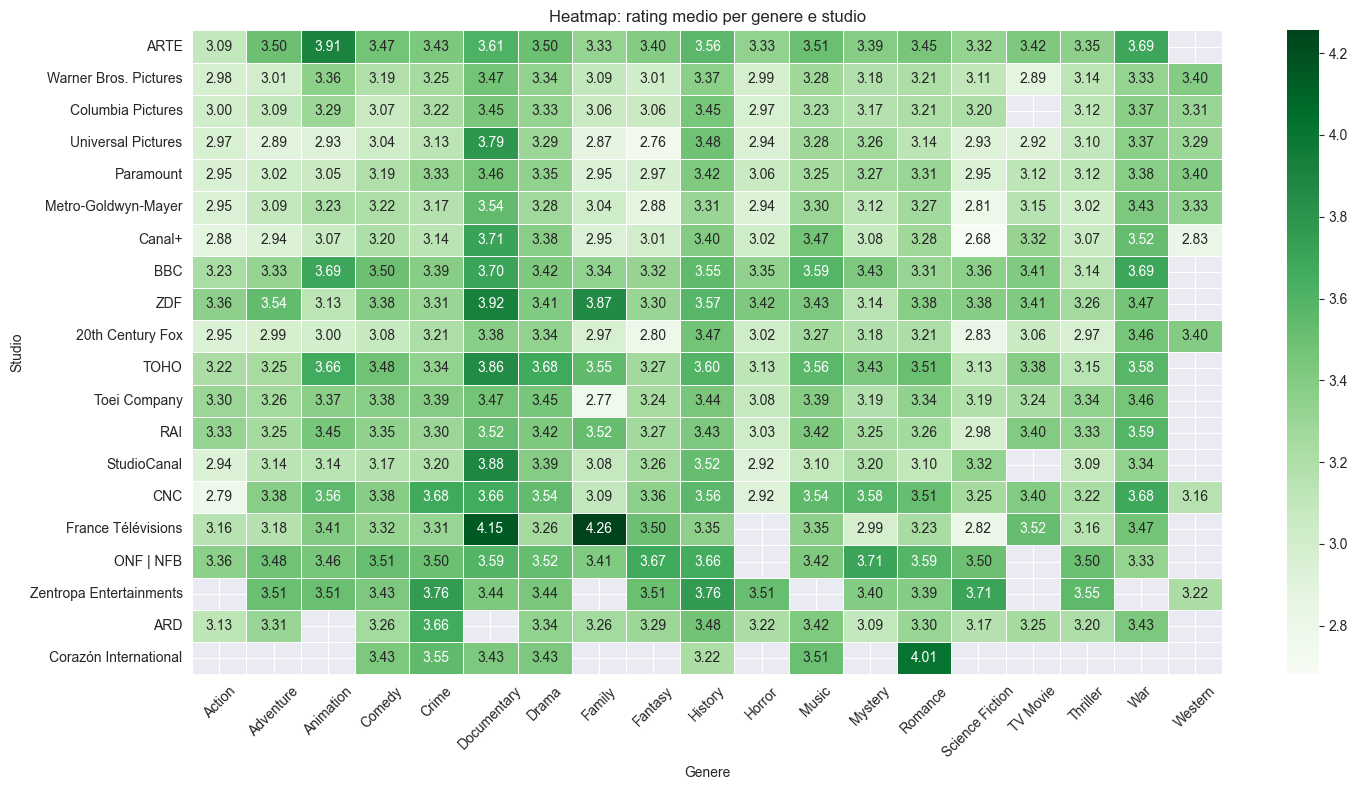

In [64]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(subset_rating, annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)
ax.set_title("Heatmap: rating medio per genere e studio")
ax.set_xlabel("Genere")
ax.set_ylabel("Studio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### generiamo un altro csv per lo una futura analisi sugli studios

In [161]:
movies_w_top_20_studios.to_csv("File_normalizzati/movies_w_top_20_studios.csv", index = False)

### Utilizzo dataset actors

In [65]:
actors_csv_df = pd.read_csv("Main_data/actors.csv")

In [66]:
# siccome gli attori sono molti per film ci concentriamo solo sui protagonisti che si suppone siano presenti tra i primi 3 o 5
# in questo caso ho scelto i primi tre ma si possono utilizzare facilmente anche i primi cinque
actors_df = actors_csv_df.groupby("id").head(3).reset_index(drop = True)

In [67]:
# otteniamo il dataset combinato tra gli attori principali e il film
movies_w_actor_df = pd.merge(movies_w_genres_and_country_df.rename(columns = {"name" : "film_name"}), actors_df.rename(columns = {"name" : "actor"}), on = "id")
movies_w_actor_df

id film_name    date  \
0        1000001    Barbie  2023.0   
1        1000001    Barbie  2023.0   
2        1000001    Barbie  2023.0   
3        1000001    Barbie  2023.0   
4        1000001    Barbie  2023.0   
...          ...       ...     ...   
1739614  1941596        重生     NaN   
1739615  1941596        重生     NaN   
1739616  1941596        重生     NaN   
1739617  1941596        重生     NaN   
1739618  1941596        重生     NaN   

                                               description  minute  rating  \
0        Barbie and Ken are having the time of their li...   114.0    3.86   
1        Barbie and Ken are having the time of their li...   114.0    3.86   
2        Barbie and Ken are having the time of their li...   114.0    3.86   
3        Barbie and Ken are having the time of their li...   114.0    3.86   
4        Barbie and Ken are having the time of their li...   114.0    3.86   
...                                                    ...     ...     ...   
1739614  In a world where order has broken down, darkne...     NaN     NaN   
1739615  In a world where order has broken down, darkne...     NaN     NaN   
1739616  In a world where order has broken down, darkne...     NaN     NaN   
1739617  In a world where order has broken down, darkne...     NaN     NaN   
1739618  In a world where order has broken down, darkne...     NaN     NaN   

        country      genre year_range            actor          role  
0            UK     Comedy  2020-2031    Margot Robbie        Barbie  
1            UK     Comedy  2020-2031     Ryan Gosling           Ken  
2            UK     Comedy  2020-2031  America Ferrera        Gloria  
3            UK  Adventure  2020-2031    Margot Robbie        Barbie  
4            UK  Adventure  2020-2031     Ryan Gosling           Ken  
...         ...        ...        ...              ...           ...  
1739614   China     Action        NaN       Ethan Juan      An Du/安渡  
1739615   China     Action        NaN   Sandrine Pinna           NaN  
1739616   China      Crime        NaN      Nick Cheung  Zhang Yao/张耀  
1739617   China      Crime        NaN       Ethan Juan      An Du/安渡  
1739618   China      Crime        NaN   Sandrine Pinna           NaN  

[1739619 rows x 11 columns]

##### l'attore più attivo nella storia

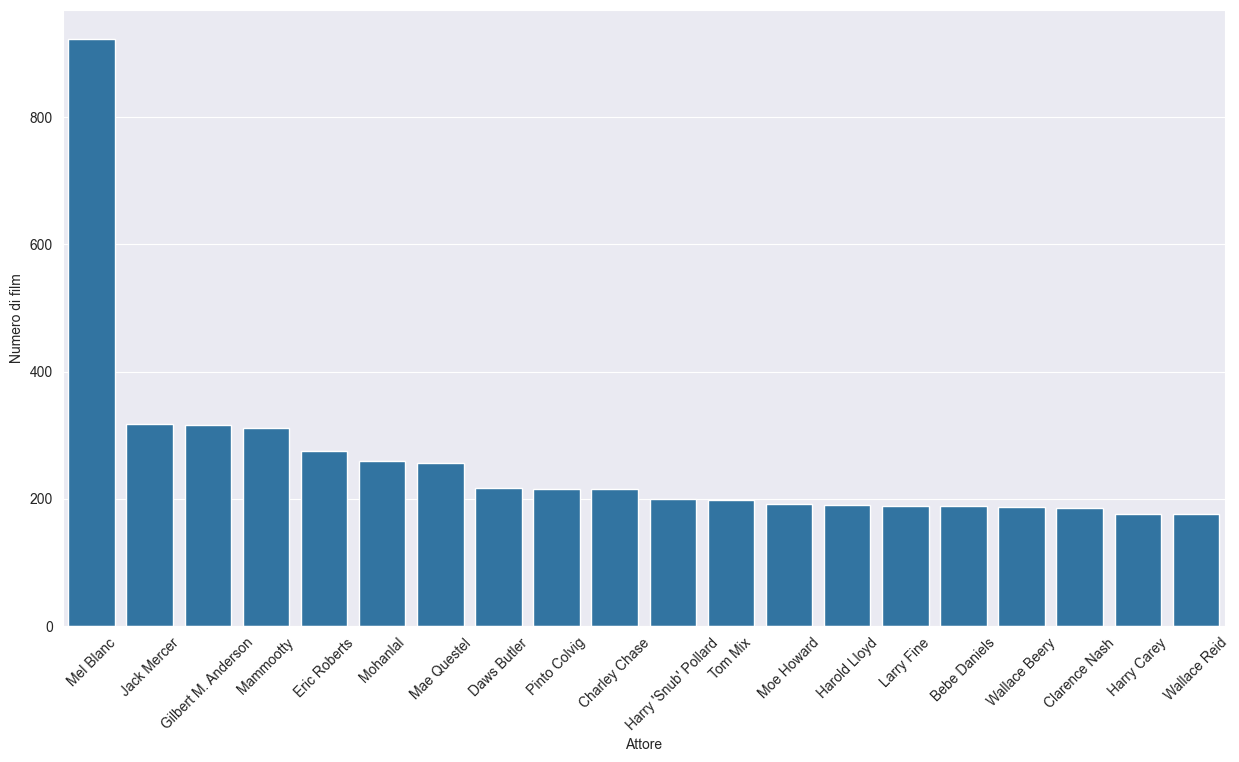

actor   id
0              Mel Blanc  923
1            Jack Mercer  317
2    Gilbert M. Anderson  316
3              Mammootty  311
4           Eric Roberts  275
5               Mohanlal  259
6            Mae Questel  256
7            Daws Butler  217
8           Pinto Colvig  216
9          Charley Chase  215
10  Harry 'Snub' Pollard  199
11               Tom Mix  198
12            Moe Howard  192
13          Harold Lloyd  190
14            Larry Fine  189
15          Bebe Daniels  188
16         Wallace Beery  187
17         Clarence Nash  185
18           Harry Carey  176
19          Wallace Reid  176

In [168]:
# da considerare che i dati non sono universali in quanto il dataset degli attori è stato ridotto
films_per_actor_top_20 = movies_w_actor_df.groupby("actor")["id"].nunique().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize = (15, 8))
ax = sns.barplot(data = films_per_actor_top_20, x = "actor", y = "id")
plt.xlabel("Attore")
plt.ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()

films_per_actor_top_20

##### il genere preferito degli attori

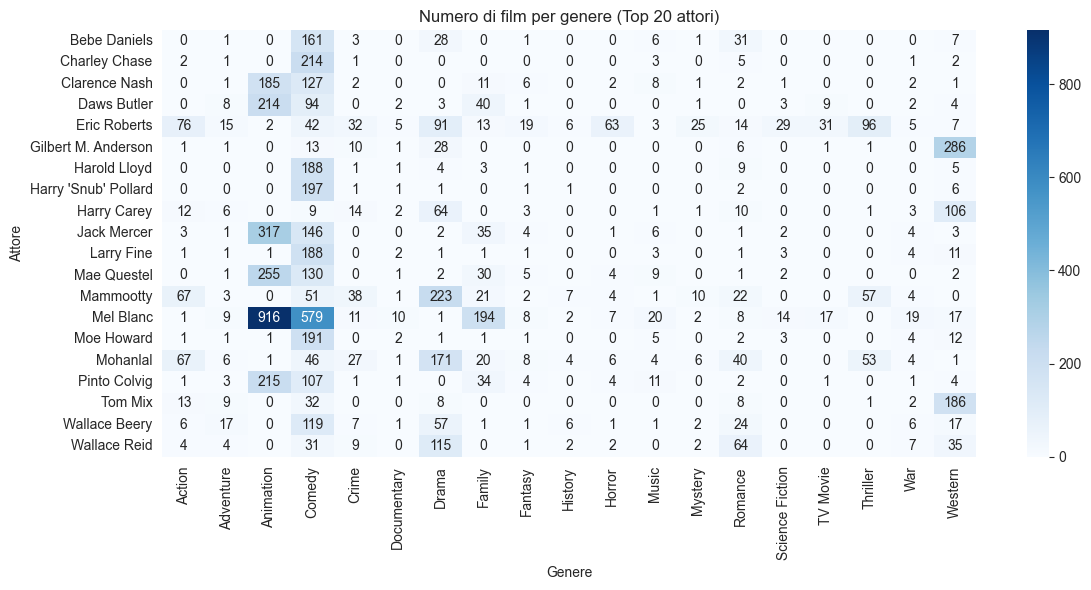

In [69]:
# Conta combinazioni actor-genre
actor_genre = movies_w_actor_df.groupby(["actor","genre"])["id"].nunique().reset_index().rename(columns={"id":"count"})

hg = actor_genre[actor_genre["actor"].isin(films_per_actor_top_20["actor"])].pivot_table(
    index="actor",
    columns="genre",
    values="count",
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(hg, annot=True, fmt=".0f", cmap="Blues")
plt.title("Numero di film per genere (Top 20 attori)")
plt.ylabel("Attore")
plt.xlabel("Genere")
plt.tight_layout()
plt.show()

##### andamento temporale dell'attività di un attore

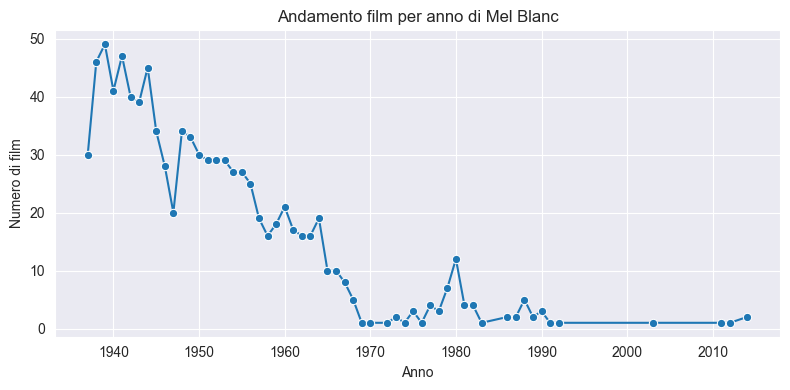

In [70]:
# Conteggio per anno e attore
time_series = movies_w_actor_df.groupby(["actor","date"])["id"].nunique().reset_index().sort_values(["actor","date"])
actor_name = "Mel Blanc"
# Filtra un attore
actor_ts = time_series[time_series["actor"] == actor_name]

plt.figure(figsize=(8,4))
ax = sns.lineplot(data=actor_ts, x="date", y="id", marker="o")
plt.title(f"Andamento film per anno di {actor_name}")
plt.xlabel("Anno")
plt.ylabel("Numero di film")
plt.tight_layout()
plt.show()

##### top 20 attori dal 2000 in poi

In [165]:
actor_from_2000_df = movies_w_actor_df[movies_w_actor_df["date"] >= 2000]

films_per_actor_2000 = (actor_from_2000_df.groupby('actor')['id'].nunique().sort_values(ascending=False).reset_index(name='n_films')
)
films_per_actor_2000_top_20 = films_per_actor_2000.head(20)
films_per_actor_2000_top_20

actor  n_films
0           Eric Roberts      214
1            Min Do-yoon      160
2          Junji Inagawa      120
3              Mammootty      111
4            Prakash Raj      110
5     Yoshihiro Nakamura      110
6          Kana Hanazawa      109
7     David Attenborough      108
8           Lee Chae-dam      108
9               Mohanlal      105
10        Michael Madsen       99
11          Kang Min-woo       96
12         Vivica A. Fox       95
13          Akshay Kumar       94
14         Debbie Rochon       92
15  Prithviraj Sukumaran       91
16           Danny Trejo       91
17             Dean Cain       89
18               Sae Bom       86
19              Sang Woo       85

##### valutazione media dei film per attore considerandone 20

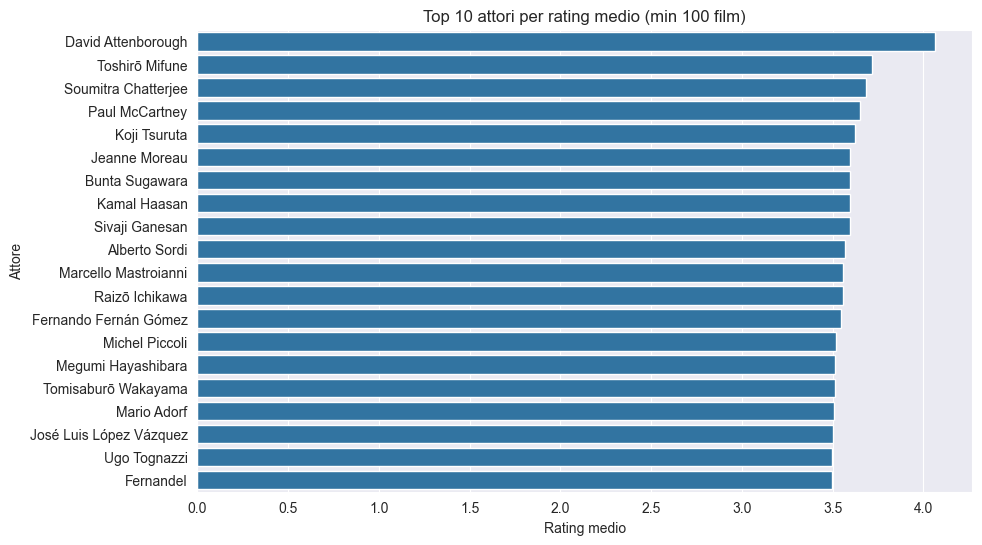

In [72]:
rating_per_actor = movies_w_actor_df.groupby("actor")["rating"].mean().sort_values(ascending=False).reset_index()
rating_per_actor.columns = ["actor", "avg_rating"]

counts = movies_w_actor_df.groupby("actor")["id"].nunique()
valid_actors = counts[counts >= 100].index

top_rated = rating_per_actor[rating_per_actor["actor"].isin(valid_actors)].head(20)

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_rated, x="avg_rating", y="actor")
plt.title("Top 10 attori per rating medio (min 100 film)")
plt.xlabel("Rating medio")
plt.ylabel("Attore")

plt.show()

### Utilizzo del dataset degli oscar

In [73]:
oscar_csv = pd.read_csv("Additional_data/the_oscar_awards.csv")

oscar_csv = oscar_csv.rename(columns = {"film" : "film_name", "year_film" : "date"})

In [74]:
movies_w_oscar = pd.merge(movies_w_actor_df, oscar_csv, on = ["film_name", "date"])
movies_w_oscar = movies_w_oscar.rename(columns = {"name" : "nomination"})

In [75]:
movies_w_oscar

id film_name    date  \
0      1000001    Barbie  2023.0   
1      1000001    Barbie  2023.0   
2      1000001    Barbie  2023.0   
3      1000001    Barbie  2023.0   
4      1000001    Barbie  2023.0   
...        ...       ...     ...   
75933  1810292   Yojimbo  1961.0   
75934  1810292   Yojimbo  1961.0   
75935  1810292   Yojimbo  1961.0   
75936  1810292   Yojimbo  1961.0   
75937  1810292   Yojimbo  1961.0   

                                             description  minute  rating  \
0      Barbie and Ken are having the time of their li...   114.0    3.86   
1      Barbie and Ken are having the time of their li...   114.0    3.86   
2      Barbie and Ken are having the time of their li...   114.0    3.86   
3      Barbie and Ken are having the time of their li...   114.0    3.86   
4      Barbie and Ken are having the time of their li...   114.0    3.86   
...                                                  ...     ...     ...   
75933  Yojimbo is a low budget 1961 Japanese samurai ...    63.0     NaN   
75934  Yojimbo is a low budget 1961 Japanese samurai ...    63.0     NaN   
75935  Yojimbo is a low budget 1961 Japanese samurai ...    63.0     NaN   
75936  Yojimbo is a low budget 1961 Japanese samurai ...    63.0     NaN   
75937  Yojimbo is a low budget 1961 Japanese samurai ...    63.0     NaN   

      country   genre year_range                actor           role  \
0          UK  Comedy  2020-2031        Margot Robbie         Barbie   
1          UK  Comedy  2020-2031        Margot Robbie         Barbie   
2          UK  Comedy  2020-2031        Margot Robbie         Barbie   
3          UK  Comedy  2020-2031        Margot Robbie         Barbie   
4          UK  Comedy  2020-2031        Margot Robbie         Barbie   
...       ...     ...        ...                  ...            ...   
75933   Japan   Drama  1960-1970  Kakurina Koutsomatu  Female victim   
75934   Japan   Drama  1960-1970      Shinwa Katayaku     Samurai #2   
75935   Japan  Action  1960-1970      Namako Miyamaru     Samurai #1   
75936   Japan  Action  1960-1970  Kakurina Koutsomatu  Female victim   
75937   Japan  Action  1960-1970      Shinwa Katayaku     Samurai #2   

       year_ceremony  ceremony                          category  \
0               2024        96        ACTOR IN A SUPPORTING ROLE   
1               2024        96      ACTRESS IN A SUPPORTING ROLE   
2               2024        96                    COSTUME DESIGN   
3               2024        96             MUSIC (Original Song)   
4               2024        96             MUSIC (Original Song)   
...              ...       ...                               ...   
75933           1962        34  COSTUME DESIGN (Black-and-White)   
75934           1962        34  COSTUME DESIGN (Black-and-White)   
75935           1962        34  COSTUME DESIGN (Black-and-White)   
75936           1962        34  COSTUME DESIGN (Black-and-White)   
75937           1962        34  COSTUME DESIGN (Black-and-White)   

                                              nomination  winner  
0                                           Ryan Gosling   False  
1                                        America Ferrera   False  
2                                      Jacqueline Durran   False  
3        Music and Lyric by Mark Ronson and Andrew Wyatt   False  
4      Music and Lyric by Billie Eilish and Finneas O...    True  
...                                                  ...     ...  
75933                                     Yoshiro Muraki   False  
75934                                     Yoshiro Muraki   False  
75935                                     Yoshiro Muraki   False  
75936                                     Yoshiro Muraki   False  
75937                                     Yoshiro Muraki   False  

[75938 rows x 16 columns]

##### qual è il film che ha ricevuto più oscar

In [76]:
winners = (movies_w_oscar[movies_w_oscar["winner"] == True])

winners_film_unique = winners.drop_duplicates(subset=["film_name", "year_ceremony", "category"])


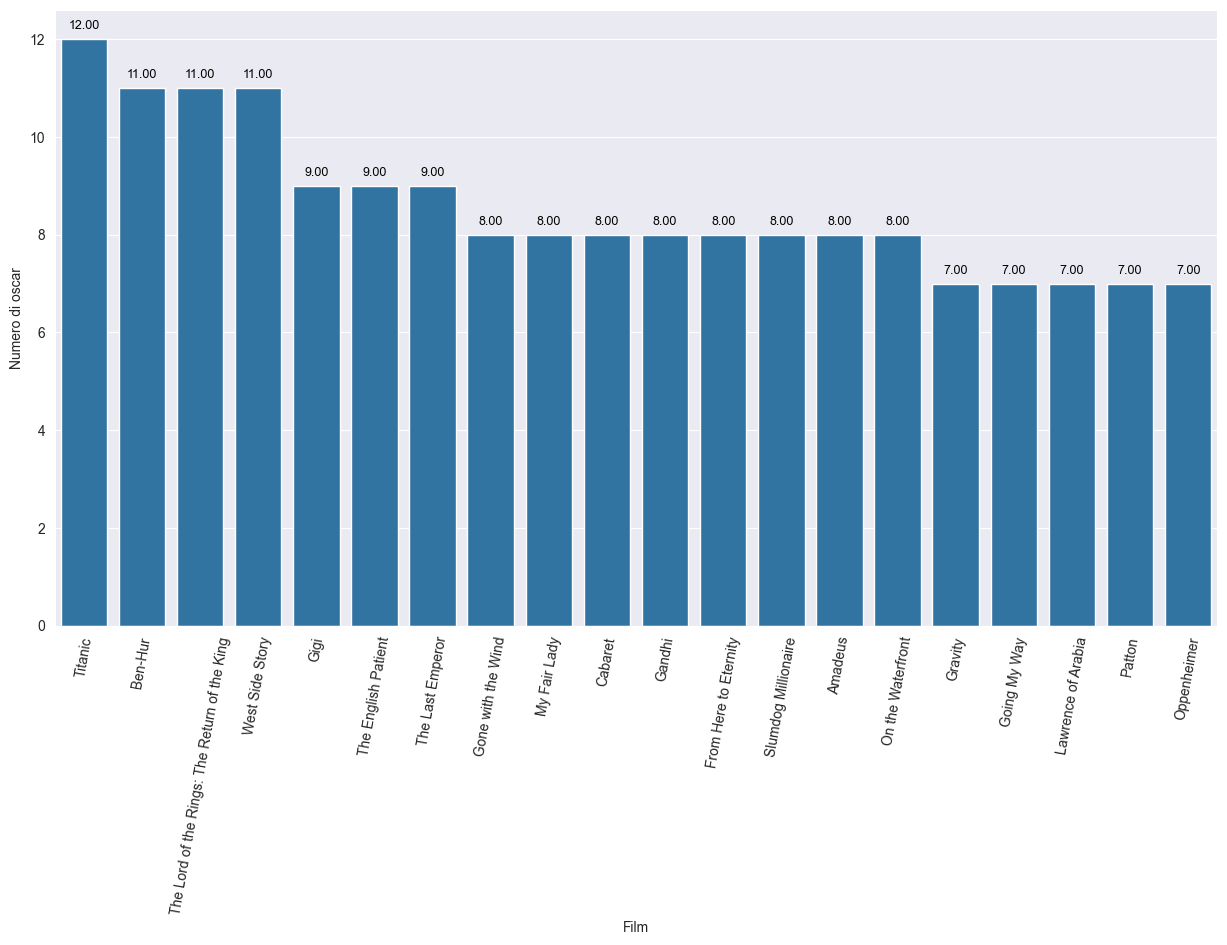

In [167]:
oscar_per_film = (winners_film_unique.groupby("film_name").size().reset_index(name="num_oscar").sort_values("num_oscar", ascending=False))

plt.figure(figsize = (15, 8))
ax = sns.barplot(data = oscar_per_film.head(20), x = "film_name", y = "num_oscar")
add_count_on_bars(ax)
plt.xlabel("Film")
plt.ylabel("Numero di oscar")
plt.xticks(rotation = 80)
plt.show()

##### qual è il rating del film che ha ricevuto più oscar

In [78]:
oscar_per_film = oscar_per_film.reset_index(drop = True)
name_film_oscar_top = oscar_per_film.loc[0]["film_name"]

rating_film_oscar = movies_w_oscar.loc[movies_w_oscar["film_name"] == name_film_oscar_top]["rating"].iloc[0]

print(f"il film che ha vinto più oscar è {name_film_oscar_top} con un rating di {rating_film_oscar}")

il film che ha vinto più oscar è Titanic con un rating di 3.81


##### qual è l'attore che ha ricevuto più oscar

In [169]:
winners_act_unique = winners.drop_duplicates(subset = ["nomination", "year_ceremony", "category"])

mask = winners_act_unique['category'].str.lower().str.startswith(('actor', 'actress'))

acting_awards = winners_act_unique[mask]

oscar_per_actor = (acting_awards.groupby("nomination").size().reset_index(name="num_oscar")).sort_values("num_oscar", ascending = False)
oscar_per_actor

nomination  num_oscar
116        Ingrid Bergman          3
169     Katharine Hepburn          3
209          Meryl Streep          3
283        Walter Brennan          3
142         Jessica Lange          2
..                    ...        ...
33   Catherine Zeta-Jones          1
34           Celeste Holm          1
35         Charles Coburn          1
36        Charlize Theron          1
37        Charlton Heston          1

[294 rows x 2 columns]

##### qual è la differenza di oscar ricevuti dagli uomini rispetto alle donne

In [80]:
acting = acting_awards.copy()

acting["gender"] = acting_awards["category"].str.lower().apply(lambda c: "Man" if c.startswith("actor ") else "Woman")

# Calcoliamo il numero totale di statuette per genere
awards_by_gender = acting.groupby("gender").size().reset_index(name="num_oscar")

unique_winners_by_gender = (acting.groupby("gender")["actor"].nunique().reset_index(name="num_unique_winners"))

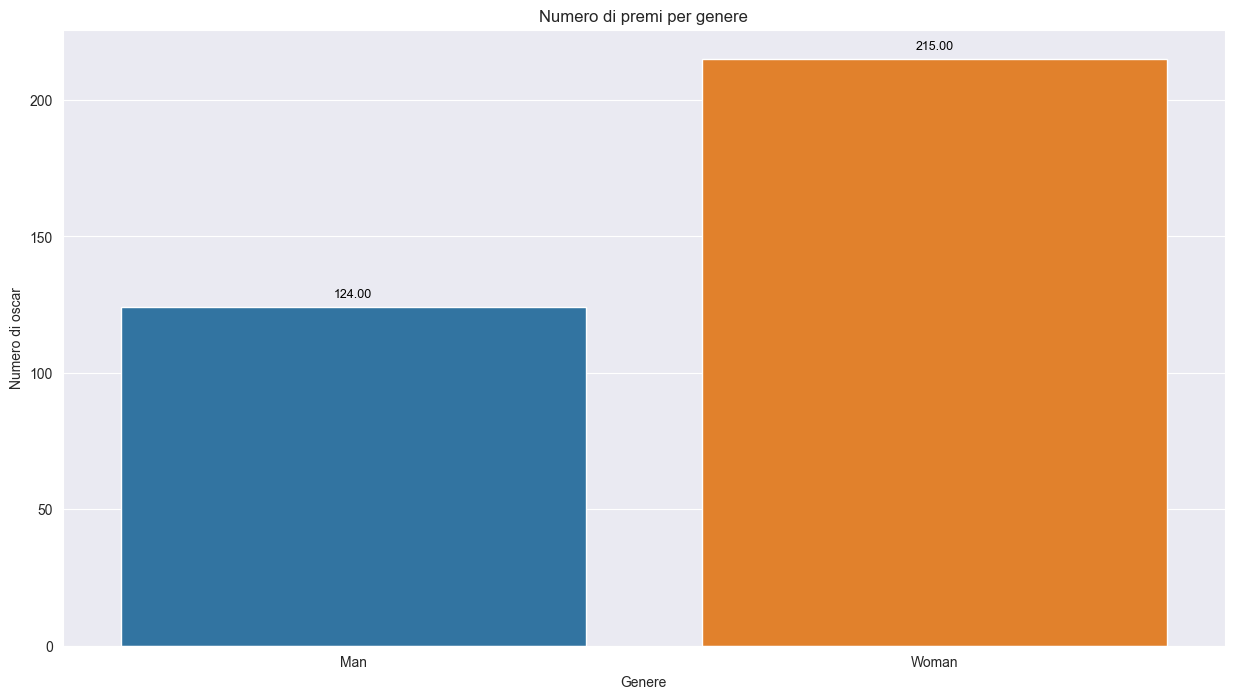

In [170]:
plt.figure(figsize = (15, 8))
ax = sns.barplot(data = awards_by_gender, x = "gender", y = "num_oscar", hue = "gender")
add_count_on_bars(ax)
plt.title("Numero di premi per genere")
plt.xlabel("Genere")
plt.ylabel("Numero di oscar")
plt.show()


##### qual è la nazione che ha ricevuto più oscar

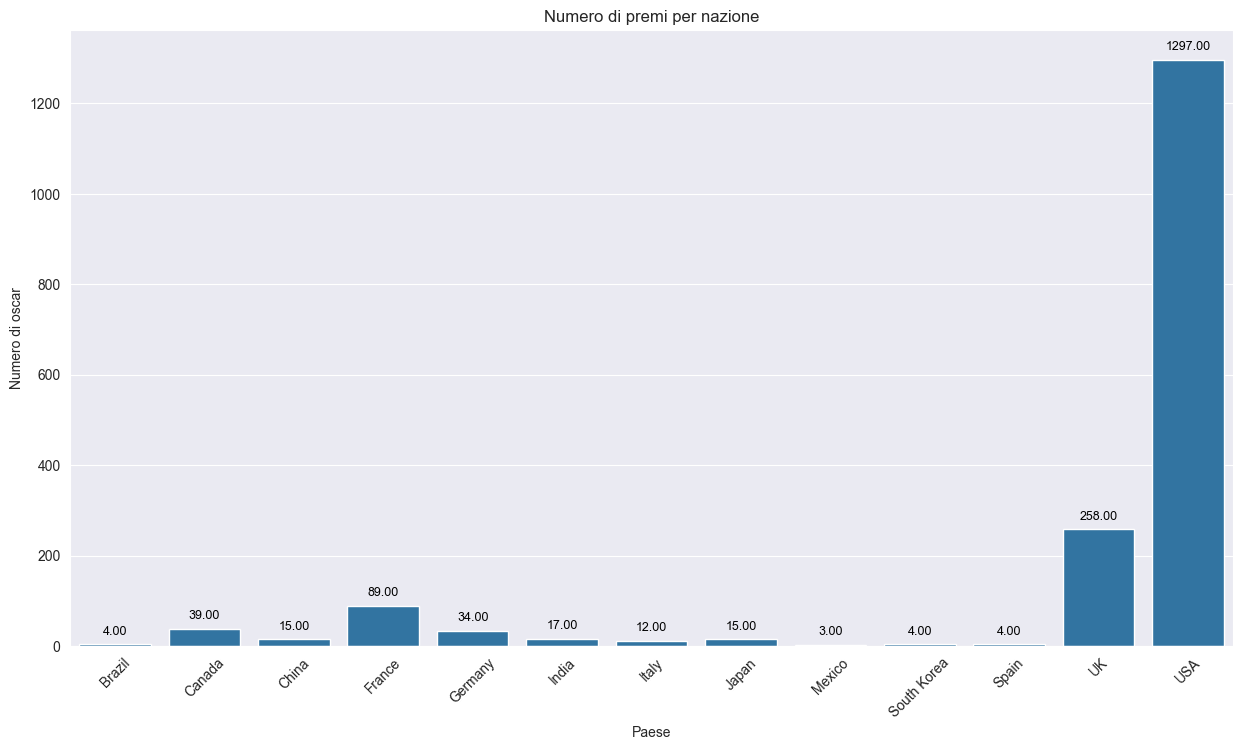

In [171]:

awards_by_country = (winners_film_unique.groupby("country").size().reset_index(name="num_oscar"))

plt.figure(figsize = (15, 8))
ax = sns.barplot(data = awards_by_country, x = "country", y = "num_oscar")
add_count_on_bars(ax)

plt.title("Numero di premi per nazione")
plt.xlabel("Paese")
plt.ylabel("Numero di oscar")
plt.xticks(rotation = 45)
plt.show()

##### qual è il genere che ha vinto più oscar

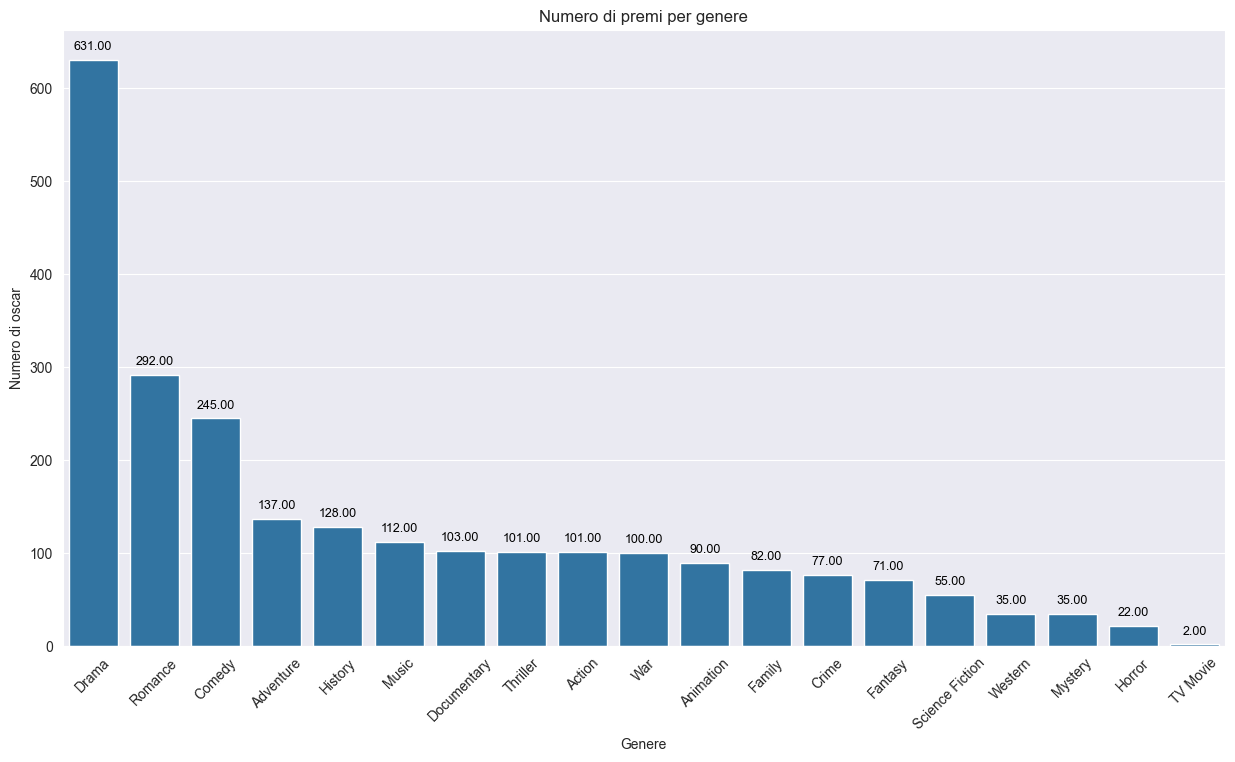

In [83]:
genre_winner = winners.drop_duplicates(subset = ["film_name", "genre"]).groupby("genre").size().reset_index(name = "num_oscar").sort_values("num_oscar", ascending = False)

plt.figure(figsize = (15,8))
ax = sns.barplot(data = genre_winner, x = "genre", y = "num_oscar")
add_count_on_bars(ax)
plt.title("Numero di premi per genere")
plt.xlabel("Genere")
plt.ylabel("Numero di oscar")
plt.xticks(rotation = 45)
plt.show()

 ##### lineplot dell'andamento nel tempo delle vittore delle rispettive categorie

In [84]:
genre_winner_year = winners.drop_duplicates(subset=["film_name", "genre"])

trend_genre = (genre_winner_year.groupby(["year_range", "genre"], observed = False).size().reset_index(name="num_wins"))

fig = px.line(
    trend_genre,
    x="year_range",
    y="num_wins",
    color="genre",
    labels={
        "year_range": "Fascia di Anno",
        "num_wins": "Numero di Vittorie",
        "genre": "Genere"
    },
    title="Andamento delle Vittorie Oscar per Genere nel Tempo"
)
fig.update_traces(mode="lines+markers")
fig.update_layout(xaxis_title="Fascia di Anno", yaxis_title="Numero di Vittorie", width = 1000, height = 800)
fig.show()

##### lineplot dell'andamento nel tempo delle vittore per uomini e donne

In [85]:
trend_gender = (acting.groupby(["year_range", "gender"], observed = False).size().reset_index(name = "num_oscar"))

fig2 = px.line(
    trend_gender,
    x="year_range",
    y="num_oscar",
    color="gender",
    markers=True,
    labels={
        "year_range": "Fascia di Anno",
        "num_wins": "Numero di Vittorie",
        "gender": "Genere"
    },
    title="Andamento delle Vittorie Oscar per Genere (Sesso) nel Tempo"
)
fig2.update_layout(xaxis_title="Fascia di Anno", yaxis_title="Numero di Vittorie")
fig2.show()

#### generiamo l'ultimo csv per analisi succesive sugli attori

In [174]:
movies_w_oscar.to_csv("File_normalizzati/movies_w_actors_&_oscar.csv", index = False)